# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import PercentFormatter
from scipy import stats as st
from scipy.stats import norm, beta
import matplotlib.ticker as ticker
import re
import math
#from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import pickle

# IMPORT DATASETS

In [2]:
####CHECK STORED DF#####
# Deserialization
with open("dfXY.pickle", "rb") as infile:
    dfXYPickle = pickle.load(infile)
#print("Reconstructed object", dfXYPickle)

In [3]:
####CHECK STORED DF#####
# Deserialization
with open("dfXYFull.pickle", "rb") as infile:
    dfXYFullPickle = pickle.load(infile)
#print("Reconstructed object", dfXYFullPickle)
dfXYFullPickle.columns.tolist()

['AP1_FurnaceThickness',
 'AP1_FurnaceWidth',
 'AP1_FurnaceCombustionAirPressureCV',
 'AP1_FurnaceCombustionAirPressureFeedback',
 'AP1_FurnaceCombustionAirPressureSetPoint',
 'AP1_FurnaceCombustionAirTempFurnace',
 'AP1_FurnaceDilutionAirTemperatureCV',
 'AP1_FurnaceDilutionAirTemperatureFeedback',
 'AP1_FurnaceDilutionAirTemperatureSetPoint',
 'AP1_FurnaceLineSpeed',
 'AP1_FurnaceNonContactWaterPressure',
 'AP1_FurnacePressureCV',
 'AP1_FurnacePressureFeedback',
 'AP1_FurnacePressureSetPoint',
 'AP1_FurnacePyro1Temp',
 'AP1_FurnacePyro2Temp',
 'AP1_FurnaceRecuperatorInletTemp',
 'AP1_FurnaceRecuperatorOutletTemp',
 'AP1_FurnaceTV',
 'AP1_FurnaceTonsPerHour',
 'AP1_FurnaceTotalMeasuredGasFlow',
 'AP1_FurnaceTotalSummedAirFlow',
 'AP1_FurnaceWeldInFurnace',
 'AP1_FurnaceZone0BottomAir/GasRatioPV',
 'AP1_FurnaceZone0BottomAir/GasRatioSP',
 'AP1_FurnaceZone0BottomAirFlowControlValveCV',
 'AP1_FurnaceZone0BottomAirFlowFdbk',
 'AP1_FurnaceZone0BottomAirFlowSetpoint',
 'AP1_FurnaceZone0Bott

In [4]:
dfXYPickle.columns.tolist()

['AP1_FurnaceThickness',
 'AP1_FurnaceWidth',
 'AP1_FurnaceCombustionAirPressureCV',
 'AP1_FurnaceCombustionAirPressureFeedback',
 'AP1_FurnaceCombustionAirPressureSetPoint',
 'AP1_FurnaceCombustionAirTempFurnace',
 'AP1_FurnaceDilutionAirTemperatureCV',
 'AP1_FurnaceDilutionAirTemperatureFeedback',
 'AP1_FurnaceDilutionAirTemperatureSetPoint',
 'AP1_FurnaceLineSpeed',
 'AP1_FurnaceNonContactWaterPressure',
 'AP1_FurnacePressureCV',
 'AP1_FurnacePressureFeedback',
 'AP1_FurnacePressureSetPoint',
 'AP1_FurnacePyro1Temp',
 'AP1_FurnacePyro2Temp',
 'AP1_FurnaceRWPEntryTemp',
 'AP1_FurnaceRWPExitTemp',
 'AP1_FurnaceRecuperatorInletTemp',
 'AP1_FurnaceRecuperatorOutletTemp',
 'AP1_FurnaceTV',
 'AP1_FurnaceTonsPerHour',
 'AP1_FurnaceTotalMeasuredGasFlow',
 'AP1_FurnaceTotalSummedAirFlow',
 'AP1_FurnaceWeldInFurnace',
 'AP1_FurnaceZone0BottomAir/GasRatioPV',
 'AP1_FurnaceZone0BottomAir/GasRatioSP',
 'AP1_FurnaceZone0BottomAirFlowControlValveCV',
 'AP1_FurnaceZone0BottomAirFlowFdbk',
 'AP1_Fur

In [5]:
####CHECK STORED DF#####
# Deserialization
with open("dfXY_coils.pickle", "rb") as infile:
    dfXY_coilsPickle = pickle.load(infile)
#print("Reconstructed object", dfXYPickle)
dfXY = dfXYPickle.copy()

In [6]:
dfXY_coils = dfXY_coilsPickle.copy()
dfXY_coils

ts
2024-05-09 08:40:00    04BF4N
2024-05-09 08:42:00    04BF4N
2024-05-09 08:44:00    04BF4N
2024-05-09 08:46:00    04BF4N
2024-05-09 08:48:00    04BF4N
                        ...  
2024-06-14 08:52:00    04BL3B
2024-06-14 08:54:00    04BL3B
2024-06-14 08:56:00    04BL3B
2024-06-14 08:58:00    04BL3B
2024-06-14 09:00:00    04BL3B
Length: 21921, dtype: object

In [7]:
print(dfXY.shape)
print(dfXYFullPickle. shape)
print(dfXY_coils.shape)

(21907, 186)
(21907, 206)
(21921,)


In [8]:
print(dfXY.shape)
dfXY.head()

(21907, 186)


,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,AP1_FurnaceZone8TurndownOn,CurrentGuage,CurrentWidth,CoilLength,NetWeight,grade,pyro2,SteelFamCluster
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,100.139836,2013.073486,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal
2024-05-09 08:42:00,0.04,61.0,100.0,0.956586,2.0,378.090790,0.0,374.100006,1700.0,124.969482,...,99.302085,2042.722168,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal
2024-05-09 08:44:00,0.04,61.0,100.0,0.912703,2.0,387.829865,0.0,383.867920,1700.0,125.030533,...,99.481579,2061.698975,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal
2024-05-09 08:46:00,0.04,61.0,100.0,0.803997,2.0,395.004517,0.0,389.723236,1700.0,99.938957,...,95.844959,2067.184082,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal
2024-05-09 08:48:00,0.04,61.0,100.0,0.795104,2.0,399.344269,0.0,394.763733,1700.0,129.975586,...,96.956424,2083.272949,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal


In [9]:
#dfXY.dtypes

In [10]:
dfXYold=dfXY.copy()

# CLEAN DATASETS

In [11]:
dfXY["AP1_FurnaceCoilID"] = dfXY_coils[dfXY.index]

#Remove steelgradeid
dfSteelGradeID=dfXY.SteelGradeID.copy()
dfXY.drop("SteelGradeID",inplace=True,axis=1)

In [12]:
#Drop RWP sensors: not in use
dfRWP=dfXY[['AP1_FurnaceRWPEntryTemp','AP1_FurnaceRWPExitTemp']].copy()
dfXY.drop(['AP1_FurnaceRWPEntryTemp','AP1_FurnaceRWPExitTemp'],axis=1,inplace=True)

In [13]:
#Check for nan
dfXY.isna().sum().sum()

0

In [14]:
#Numeric vars
numerical_var_series=dfXY[dfXY.columns[dfXY.dtypes == np.float64]].columns#.to_list()#[0:5]
print(type(numerical_var_series))
print(len(numerical_var_series))
numerical_var_series

<class 'pandas.core.indexes.base.Index'>
173


Index(['AP1_FurnaceThickness', 'AP1_FurnaceWidth',
       'AP1_FurnaceCombustionAirPressureCV',
       'AP1_FurnaceCombustionAirPressureFeedback',
       'AP1_FurnaceCombustionAirPressureSetPoint',
       'AP1_FurnaceCombustionAirTempFurnace',
       'AP1_FurnaceDilutionAirTemperatureCV',
       'AP1_FurnaceDilutionAirTemperatureFeedback',
       'AP1_FurnaceDilutionAirTemperatureSetPoint', 'AP1_FurnaceLineSpeed',
       ...
       'AP1_FurnaceZone8TopAirGasRatioActual',
       'AP1_FurnaceZone8TopAirGasRatioSetpoint',
       'AP1_FurnaceZone8TopGasFlowControlValveOutput',
       'AP1_FurnaceZone8TopGasFlowFeedback', 'AP1_FurnaceZone8TopTemp',
       'CurrentGuage', 'CurrentWidth', 'CoilLength', 'NetWeight', 'pyro2'],
      dtype='object', length=173)

In [15]:
#Create the different groups of columns to plot
proceso_vars_series=dfXY[numerical_var_series[(~numerical_var_series.str.contains("AP1_Furnace",regex=False)) & (~numerical_var_series.str.contains("pyro2",regex=False))]].columns#.head(1)
zoneTemp_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Temp.*",regex=True)]].columns#.head(1)

zoneAirGas_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*Zone.*Air.*|.*Zone.*Gas.*",regex=True)]].columns#.head(1)

recuperator_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains("AP1_Furnace.*Dilution|Recuperator|RWP|Combustion.*",regex=True)]].columns#.head(1)

pyro_vars_series=dfXY[numerical_var_series[numerical_var_series.str.contains(".*pyro.*|.*Pyro.*",regex=True)]].columns#.head(1)

rest_vars_series=dfXY[[var for var in numerical_var_series.to_list() if var not in proceso_vars_series.to_list() and var not in zoneTemp_vars_series.to_list() and var not in zoneAirGas_vars_series.to_list() and var not in recuperator_vars_series.to_list() and var not in pyro_vars_series.to_list()]].columns#.head(1)

In [16]:
#Zone1 air SP are scaled with outdated scale, rescale:outdated scale: 47565 SCFH->updated scale: 59655 SCFH
dfXY.loc[:,zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Zone1.*AirFlowSet[Pp]oint.*",regex=True)]]=dfXY.loc[:,zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Zone1.*AirFlowSet[Pp]oint.*",regex=True)]]*47565/59655

In [17]:
#Zone2 air SP are scaled with outdated scale, rescale:outdated scale: 47565 SCFH->updated scale: 59655 SCFH
dfXY.loc[:,zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Zone2.*AirFlowSet[Pp]oint.*",regex=True)]]=dfXY.loc[:,zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Zone2.*AirFlowSet[Pp]oint.*",regex=True)]]*47565/59655

dfXY=dfXYold.copy()

## Remove outliers

#Make Ratio outliers nan to not loose data
dfXY.loc[:,dfXY.columns[dfXY.columns.str.contains("Ratio",regex=False)]] = dfXY.loc[:,dfXY.columns[dfXY.columns.str.contains("Ratio",regex=False)]].map(lambda x: x if ((x>=0) & (x<=4)) else np.nan,na_action='ignore')
#Check Ratios below 4
dfXY[dfXY.columns[dfXY.columns.str.contains("Ratio",regex=False)]].gt(4).sum(axis=0)
#Check now nans where ratios were above 4
dfXY[dfXY.columns[dfXY.columns.str.contains("Ratio",regex=False)]].isna().sum(axis=0)

In [18]:
dfXY_description=dfXY.describe()
dfXY_description

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000


In [19]:
#Cuts to consider outliers
cut_neg = dfXY_description.iloc[1] - 3*dfXY_description.iloc[2] #mean-3*std
cut_pos = dfXY_description.iloc[1] + 3*dfXY_description.iloc[2] #mean+3*std
cut_neg.name = 'cut-'
cut_pos.name = 'cut+'
cut_neg = pd.DataFrame(cut_neg).T
cut_pos = pd.DataFrame(cut_pos).T
tbl_desc = pd.concat([dfXY_description,cut_neg, cut_pos])
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000
cut-,-0.043189,36.441236,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,-33.323604,...,-6.595676,1.192952,-10.385352,-46.637595,1309.246645,-0.043225,36.444376,-4088.743895,34320.995773,1499.740445
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,10.147683,1.206994,80.690105,162.647455,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538


In [20]:
#Tune cut
for c in range(tbl_desc.shape[1]):
    if tbl_desc.loc['cut-',tbl_desc.columns[c]]<0:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
    if tbl_desc.columns[c]=='AP1_FurnaceWidth':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0 #some widthIDs are smaller than the actual cut-
    elif tbl_desc.columns[c]=='NetWeight':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=5000 #min around 20k, if cut for defects would be 10k. To be conservative 5k
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains('Ratio',regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=4
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains("P1_FurnaceZone.*[C].*[V].*",regex=True)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100 #CV vars are in %
    elif  tbl_desc.columns[c] in zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains("Zone0",regex=False) & ~zoneAirGas_vars_series.str.contains("Ratio",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100 #Zone0 airgas vars are in %
    elif tbl_desc.columns[c] in zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]:
        if tbl_desc.loc['cut-',tbl_desc.columns[c]]<=500:
            tbl_desc.loc['cut-',tbl_desc.columns[c]]=500 #Zone 0 seems to have many values near 0 that are outside the bell
    elif tbl_desc.columns[c] in pyro_vars_series[pyro_vars_series.str.contains("Temp",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=1400 #pyro sensors seem to have many values at 1200 that are outside the bimodal bell, p() bc it is the lower limit of the sensor
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioActual,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.776004,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,2.790560,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,0.833438,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200340,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.203946,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.249647,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,162.270401,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000
cut-,0.000000,0.000000,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1309.246645,0.000000,36.444376,0.000000,5000.000000,1499.740445
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,4.000000,4.000000,100.000000,162.647455,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538


In [21]:
#Remove outliers
for var in tbl_desc.columns:
    dfXY.loc[:,var]=dfXY.loc[:,var].map(lambda x: x if ((x>=tbl_desc.loc["cut-",var]) & (x<=tbl_desc.loc["cut+",var])) else np.nan,na_action='ignore')
dfXY.isna().sum(axis=0)

AP1_FurnaceThickness                        0
AP1_FurnaceWidth                            0
AP1_FurnaceCombustionAirPressureCV          0
AP1_FurnaceCombustionAirPressureFeedback    0
AP1_FurnaceCombustionAirPressureSetPoint    0
                                           ..
NetWeight                                   0
grade                                       0
pyro2                                       0
SteelFamCluster                             0
AP1_FurnaceCoilID                           0
Length: 185, dtype: int64

In [22]:
#Remove outliers when LineSpeed=0
for t in dfXY.index:
    if (dfXY.loc[t,"AP1_FurnaceLineSpeed"]==0) | (np.isnan(dfXY.loc[t,"AP1_FurnaceLineSpeed"])):
        dfXY.loc[t,dfXY.columns[~dfXY.columns.str.contains("AP1_FurnaceLineSpeed")]] = np.nan
dfXY.isna().sum(axis=0)

AP1_FurnaceThickness                        1222
AP1_FurnaceWidth                            1222
AP1_FurnaceCombustionAirPressureCV          1222
AP1_FurnaceCombustionAirPressureFeedback    1222
AP1_FurnaceCombustionAirPressureSetPoint    1222
                                            ... 
NetWeight                                   1222
grade                                       1222
pyro2                                       1222
SteelFamCluster                             1222
AP1_FurnaceCoilID                           1222
Length: 185, dtype: int64

## Create sort of SteelFamID: SteelFamCluster

[0 1]


,pyro2,count,SteelFamCluster
1,1640.0,3838,0.0
3,1725.0,947,0.0
6,1775.0,65,0.0
5,1800.0,393,0.0
8,1850.0,37,0.0
2,1900.0,2210,1.0
4,1950.0,794,1.0
0,1980.0,12346,1.0
7,1990.0,55,1.0


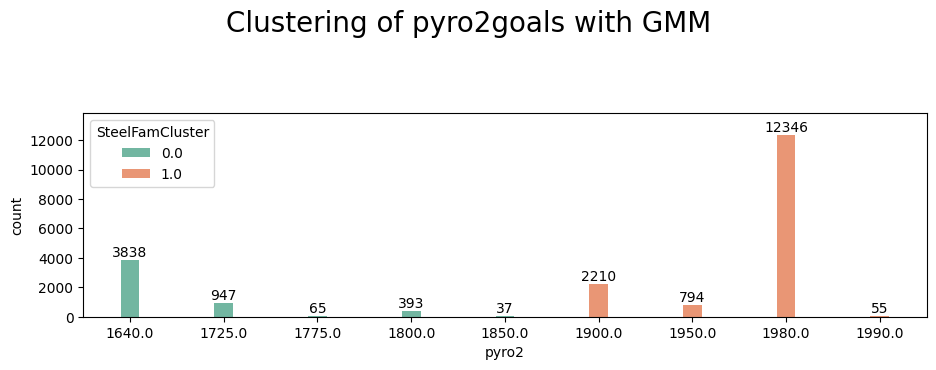

In [23]:
modelGMM = GaussianMixture(n_components=2).fit(dfXY.pyro2.dropna().to_numpy().reshape(-1,1))
clustersGMM = modelGMM.predict(dfXY.pyro2.dropna().to_numpy().reshape(-1,1))
print(np.unique(clustersGMM))
c=0
fig,ax = plt.subplots(1,1,figsize=(10,4),facecolor='white')
fig.suptitle("Clustering of pyro2goals with GMM",fontsize=20)
#Compute df
clusteringGMM_Long = pd.DataFrame(dfXY.pyro2,columns=['pyro2'])#.reset_index(drop=True)
for t in dfXY.index:
    if np.isnan(clusteringGMM_Long.loc[t,"pyro2"]):
        clusteringGMM_Long.loc[t,"SteelFamCluster"] = np.nan
    else:
        clusteringGMM_Long.loc[t,"SteelFamCluster"] = clustersGMM[c]
        c+=1
clusteringGMM=pd.merge(right=clusteringGMM_Long.drop_duplicates().reset_index(drop=True),left=pd.DataFrame(dfXY.pyro2.value_counts().reset_index()).rename(columns= {"index":"pyro2","pyro2":"count"}), how='inner',on='pyro2').sort_values(by=['pyro2'])
  
#Plor barplot
sns.barplot(data=clusteringGMM,x='pyro2',y='count',hue='SteelFamCluster',palette="Set2",width=.2,ax=ax)#,ax=ax[1]
#Add labels
barRectangles = ax.patches
labels = clusteringGMM['count'].values
label_i=0
#Cannot loop through zip(barRectangles,labels) bc barRect is larger as there are rect in the bins with 0 counts
for rect in barRectangles:#zip()stop when the shortest list ends, iterate through rect bars
    height = rect.get_height()
    if height != 0:
        #print(rect.get_x(),height+6,label)
        ax.text(x=rect.get_x()+rect.get_width()/2,y=height+6,s=str(int(height)),ha="center",va="bottom",color="black",fontsize=10)#s=str(labels[label_i])
        label_i+=1

#Make room for all labels in plot
ax.set_ylim(top=max(labels)+1500)
#Other way, but not centered horizontally as u dont have the width of the bars
#for index, value in dfXY.pyro2.value_counts().sort_index().items():
#    axes[r,c].text(x=index, y=value, s=value, color='yellow', ha='center')

fig.tight_layout(pad=3)
clusteringGMM

In [24]:
#Assign meaningfull labels to clusters
a=pd.DataFrame(modelGMM.means_,columns=["center"]).assign(label = lambda x: x.iloc[:,0].map(lambda y: "HighGoal" if y==x.max()[0] else "LowGoal")).reset_index(names="cluster")
a

,cluster,center,label
0,0,1669.917178,LowGoal
1,1,1966.928021,HighGoal


In [25]:
#Check mapping works before applying to df
# Defining all the conditions for labelling
def condition(y):
    if y==a.loc[a.label=="HighGoal","cluster"].values[0]:
        return "HighGoal"
    elif np.isnan(y):
        return np.nan
    elif y==a.loc[a.label=="LowGoal","cluster"].values[0]:
        return "LowGoal"
    else:
        pass
clusteringGMM_Long.assign(labelsGMM = lambda x: x.SteelFamCluster.map(condition).astype("category")).drop_duplicates()
#pd.DataFrame(clustersGMM,columns=['clustersGMM'],index=dfXY.index,dtype=np.int64).map(lambda y: "HighGoal" if y==a.loc[a.label=="HighGoal","cluster"][0] else "LowGoal").astype("category").copy()

,pyro2,SteelFamCluster,labelsGMM
ts,,,
2024-05-09 08:40:00,1980.0,1.0,HighGoal
2024-05-09 08:52:00,NaN,NaN,NaN
2024-05-12 12:50:00,1900.0,1.0,HighGoal
2024-05-13 11:10:00,1640.0,0.0,LowGoal
2024-05-16 02:40:00,1950.0,1.0,HighGoal
2024-05-26 20:06:00,1725.0,0.0,LowGoal
2024-05-27 07:06:00,1775.0,0.0,LowGoal
2024-05-30 19:14:00,1850.0,0.0,LowGoal
2024-05-30 19:48:00,1990.0,1.0,HighGoal


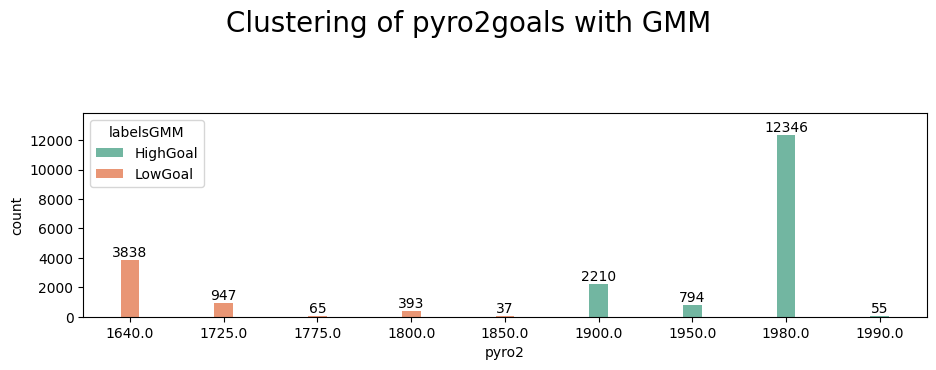

In [26]:
#Print pyro2 clusters with new label
fig,ax = plt.subplots(1,1,figsize=(10,4))
fig.suptitle("Clustering of pyro2goals with GMM",fontsize=20)
#Compute df
clusteringGMM=clusteringGMM.assign(labelsGMM = lambda x: x.SteelFamCluster.map(condition).astype("category"))
#Plor barplot
sns.barplot(data=clusteringGMM,x='pyro2',y='count',hue='labelsGMM',palette="Set2",width=.2,ax=ax)#,ax=ax[1]
#Add labels
barRectangles = ax.patches
labels = clusteringGMM['count'].values
label_i=0
#Cannot loop through zip(barRectangles,labels) bc barRect is larger as there are rect in the bins with 0 counts
for rect in barRectangles:#zip()stop when the shortest list ends, iterate through rect bars
    height = rect.get_height()
    if height != 0:
        #print(rect.get_x(),height+6,label)
        ax.text(x=rect.get_x()+rect.get_width()/2,y=height+6,s=str(int(height)),ha="center",va="bottom",color="black",fontsize=10)#s=str(labels[label_i])
        label_i+=1

#Make room for all labels in plot
ax.set_ylim(top=max(labels)+1500)
fig.tight_layout(pad=3)

In [27]:
#Add clusters to dfXY
#if dfXY.SteelFamCluster.shape: dfXY.drop("SteelFamCluster",axis=1,inplace=True)
dfXY.loc[:,'SteelFamCluster']=clusteringGMM_Long.SteelFamCluster.map(condition).astype("category")
dfXY=dfXY.copy()
dfXY.SteelFamCluster.dtypes

C:\Users\carlo\AppData\Local\Temp\ipykernel_19164\4055888561.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dfXY.loc[:,'SteelFamCluster']=clusteringGMM_Long.SteelFamCluster.map(condition).astype("category")


CategoricalDtype(categories=['HighGoal', 'LowGoal'], ordered=False)

In [28]:
dfXY.head()

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopTemp,AP1_FurnaceZone8TurndownOn,CurrentGuage,CurrentWidth,CoilLength,NetWeight,grade,pyro2,SteelFamCluster,AP1_FurnaceCoilID
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,2013.073486,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N
2024-05-09 08:42:00,0.04,61.0,100.0,0.956586,2.0,378.090790,0.0,374.100006,1700.0,124.969482,...,2042.722168,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N
2024-05-09 08:44:00,0.04,61.0,100.0,0.912703,2.0,387.829865,0.0,383.867920,1700.0,125.030533,...,2061.698975,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N
2024-05-09 08:46:00,0.04,61.0,100.0,0.803997,2.0,395.004517,0.0,389.723236,1700.0,99.938957,...,2067.184082,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N
2024-05-09 08:48:00,0.04,61.0,100.0,0.795104,2.0,399.344269,0.0,394.763733,1700.0,129.975586,...,2083.272949,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N


## Create sort of WidthFamilyID: WidthFamCluster

[0 1]
(21907, 185) (21907, 2)
[ 1. nan  0.]


,CurrentWidth,WidthFamCluster
ts,,
2024-05-09 08:40:00,61.4117,1.0
2024-05-09 08:42:00,61.4117,1.0
2024-05-09 08:44:00,61.4117,1.0
2024-05-09 08:46:00,61.4117,1.0
2024-05-09 08:48:00,61.4117,1.0
...,...,...
2024-06-14 08:52:00,61.6086,1.0
2024-06-14 08:54:00,61.6086,1.0
2024-06-14 08:56:00,61.6086,1.0


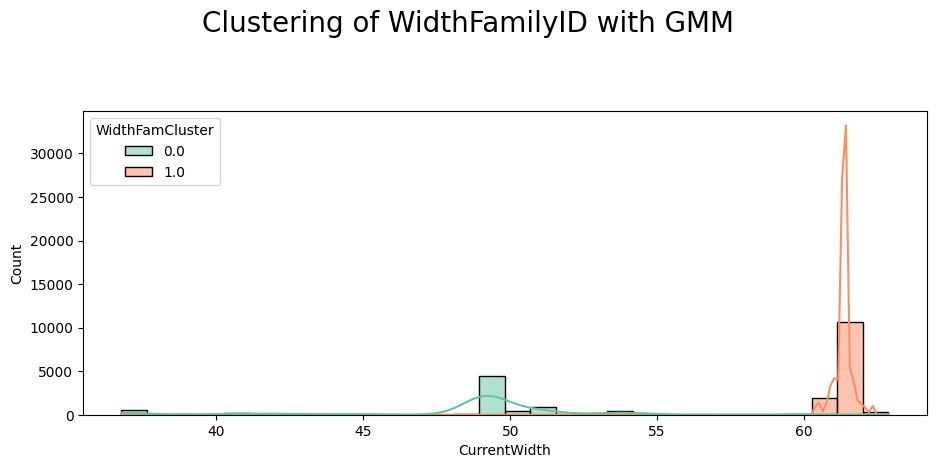

In [29]:
WidthFamCluster = GaussianMixture(n_components=2,random_state=1).fit(dfXY.CurrentWidth.dropna().to_numpy().reshape(-1,1)).predict(dfXY.CurrentWidth.dropna().to_numpy().reshape(-1,1))
print(np.unique(WidthFamCluster))
c=0
fig,ax = plt.subplots(1,1,figsize=(10,5),facecolor='white')
fig.suptitle("Clustering of WidthFamilyID with GMM",fontsize=20)
#Compute df
clusteringGMM = pd.DataFrame(dfXY.CurrentWidth,columns=['CurrentWidth'])#.reset_index(drop=True)
for t in dfXY.index:
 #clusteringGMM=pd.concat([pd.DataFrame(dfXY.CurrentWidth.dropna(),columns=['CurrentWidth']).reset_index(drop=True),pd.DataFrame(WidthFamCluster,columns=['WidthFamCluster'])],axis=1)
    if np.isnan(clusteringGMM.loc[t,"CurrentWidth"]):
        clusteringGMM.loc[t,"WidthFamCluster"] = np.nan
    else:
        clusteringGMM.loc[t,"WidthFamCluster"] = WidthFamCluster[c]
        c+=1
    #Plor histogram
sns.histplot(data=clusteringGMM,x='CurrentWidth',hue='WidthFamCluster',palette="Set2",ax=ax,kde=True)#,ax=ax[1]

fig.tight_layout(pad=3)
print(dfXY.shape,clusteringGMM.shape)
print(clusteringGMM.WidthFamCluster.unique())
clusteringGMM

In [30]:
#Add clusters to dfXY
dfXY.loc[:,'WidthFamCluster']=clusteringGMM[["WidthFamCluster"]].astype("category")
dfXY=dfXY.copy()
dfXY.WidthFamCluster.dtypes

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [31]:
dfXY.head(1)

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TurndownOn,CurrentGuage,CurrentWidth,CoilLength,NetWeight,grade,pyro2,SteelFamCluster,AP1_FurnaceCoilID,WidthFamCluster
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,0,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N,1.0


## Create rampFdbk, soakFdbk, CSdeltaTmin features

In [32]:
#CSdeltaT:Cross Section Time in Fce
#iterate timestamps of dfXY, not dfXY_coils
v0=0
time = dfXY.index[0]
dfXY['CSdeltaTmin'] = np.nan
frow0=0
for i,t in enumerate(dfXY.index): #compute CS t of coil in Fce
    if (i==0) & (dfXY.AP1_FurnaceLineSpeed.loc[t] == 0): #First row:
        frow0=1
        
    if (dfXY.AP1_FurnaceLineSpeed.loc[t] == 0) & (frow0==1):
        dfXY.loc[t,'CSdeltaTmin']=np.nan #dont know how much time will remain v=0
    elif (dfXY.AP1_FurnaceLineSpeed.loc[t] != 0) & (frow0==1):
        frow0=0
        
    if (dfXY.AP1_FurnaceLineSpeed.loc[t] == 0) & (v0==0) & (frow0!=1): #CS t inf
        v0=1
        time = t #update timeindex when v=0
    elif (v0==1) & (dfXY.AP1_FurnaceLineSpeed.loc[t] != 0):
       dfXY.loc[time:dfXY.index[i-1],'CSdeltaTmin'] = (dfXY.index[i]-time).total_seconds()/60 #if (dfXY.index[i-1]-time).total_seconds()/60 when v=0 only 1row, CSdeltaTmin=0.0 
       dfXY.loc[t,'CSdeltaTmin']=160/dfXY.loc[t,'AP1_FurnaceLineSpeed']
       v0=0
    elif (v0==0) & (dfXY.AP1_FurnaceLineSpeed.loc[t] != 0): 
        dfXY.loc[t,'CSdeltaTmin']=160/dfXY.loc[t,'AP1_FurnaceLineSpeed'] 
        
    if i == dfXY.shape[0]-1: #Last row
        if (v0==1) & (dfXY.AP1_FurnaceLineSpeed.loc[t] == 0):
            dfXY.loc[t,'CSdeltaTmin']=np.nan #dont know how much time will remain v=0 
#dfXY.CSdeltaTmin
dfXY=dfXY.copy()
dfXY.head(1)

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,CurrentGuage,CurrentWidth,CoilLength,NetWeight,grade,pyro2,SteelFamCluster,AP1_FurnaceCoilID,WidthFamCluster,CSdeltaTmin
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,0.04,61.4117,8090.3,69160.0,120,1980.0,HighGoal,04BF4N,1.0,1.280313


In [33]:
dfXY.CSdeltaTmin.describe()

count    21907.000000
mean        28.896615
std        137.996780
min          0.727192
25%          0.974819
50%          1.312368
75%          1.897755
max       2620.799836
Name: CSdeltaTmin, dtype: float64

In [34]:
#Check nan values in CSdeltaTmin
print("Nan in CSdeltaTmin:", dfXY.CSdeltaTmin.isna().sum())
#Check inf values in CSdeltaTmin
print("inf in CSdeltaTmin:",dfXY.CSdeltaTmin[dfXY.CSdeltaTmin.isin([np.inf,-np.inf])].count())
#Check Linespeed 0: inf CSdeltaTmin are bc LineSpeed=0
print("Rows linespeed=0:", dfXY[dfXY.AP1_FurnaceLineSpeed==0].AP1_FurnaceLineSpeed.count())
#Check coils when linespeed 0
print("unique coils when linespeed 0:",dfXY_coils.loc[dfXY[dfXY.AP1_FurnaceLineSpeed==0].index].unique())
#Change inf by nan
# dfXY.CSdeltaTmin=dfXY.CSdeltaTmin.map(lambda x: np.nan if np.isinf(x) else x,na_action='ignore')
# dfXY.CSdeltaTmin[dfXY.CSdeltaTmin.isin([np.inf,-np.inf])].count()
#Check statistical measure values in CSdeltaTmin
dfXY[dfXY.AP1_FurnaceLineSpeed==0][['AP1_FurnaceLineSpeed','CSdeltaTmin']]

Nan in CSdeltaTmin: 0
inf in CSdeltaTmin: 0
Rows linespeed=0: 1222
unique coils when linespeed 0: ['04BF4N' '02BF4P' '01BF6D' '02BF6K' '03BD8HB' '03BF8T' '04BH0F' '01BH4N'
 '04BH8F' '01BH7X' '03BH8DA' '05BJ2E' '02BJ6K' '04BJ7J' '03BJ7A' '01BJ9E'
 '01BK1R' '02BJ8H' '03BH2A' '01BK3C' '01BK4T' '01BK3T' '01BK8E' '03BL0E'
 '02BK9B' '05BL0F' '01BL0E' '04BL0F' '03BK8EB' '04BK7C' '03BL1A']


,AP1_FurnaceLineSpeed,CSdeltaTmin
ts,,
2024-05-09 08:52:00,0.0,30.0
2024-05-09 08:54:00,0.0,30.0
2024-05-09 08:56:00,0.0,30.0
2024-05-09 08:58:00,0.0,30.0
2024-05-09 09:00:00,0.0,30.0
...,...,...
2024-06-12 05:44:00,0.0,32.0
2024-06-12 05:46:00,0.0,32.0
2024-06-12 05:48:00,0.0,32.0


In [40]:
#Coil Time in Fce: len dfXY_coils!=dfXY bc of grades mismatches
#iterate timestamps of dfXY, not dfXY_coils
coil = dfXY_coils.loc[dfXY.index[0]]
time = dfXY.index[0]
dfCoilInFce = pd.DataFrame(dfXY_coils.loc[dfXY.index].copy(),columns=["AP1_FurnaceCoilID"])
dfCoilInFce['TFce'] = 0 
dfCoilInFce.TFce = pd.to_timedelta(dfCoilInFce.TFce)#dataframe with coil number and t of coil in fce
for i,t in enumerate(dfXY.index): #compute t of coil in fce
    if dfCoilInFce.AP1_FurnaceCoilID.loc[t] != coil: #new coil entered furnace
        dfCoilInFce.loc[time:dfCoilInFce.index[i-1],'TFce'] = dfCoilInFce.index[i-1]-time
        coil = dfCoilInFce.AP1_FurnaceCoilID.loc[t] #update coil in furnace
        time = t #update timeindex when actual coil enters furnace
    if i == dfCoilInFce.shape[0]-1: #Last row
        dfCoilInFce.loc[time:dfCoilInFce.index[i],'TFce'] = dfCoilInFce.index[i]-time

dfCoilInFce.drop_duplicates()           

,AP1_FurnaceCoilID,TFce
ts,,
2024-05-09 08:40:00,04BF4N,0 days 02:08:00
2024-05-09 10:50:00,03BF4N,0 days 00:54:00
2024-05-09 11:46:00,04BF3C,0 days 00:44:00
2024-05-09 12:32:00,01BF4N,0 days 00:44:00
2024-05-09 13:18:00,02BF4N,0 days 00:44:00
...,...,...
2024-06-14 02:52:00,04BL3D,0 days 01:04:00
2024-06-14 03:58:00,05BL3A,0 days 01:20:00
2024-06-14 05:20:00,01BL3B,0 days 01:18:00


coil = dfXY_coils.unique()[6]#6,4,5,7,8,9,10,11,13,14,15,...
dfcoil=pd.DataFrame(dfXY_coils)[pd.DataFrame(dfXY_coils).AP1_FurnaceCoilID==coil]
dfcoil
#dfXY.loc[dfcoil.index[0]:dfcoil.index[len(dfcoil.index)-1],[dfXY.columns[dfXY.columns.str.contains('.*Zone.*Temp.*Setpoint',regex=True)].values.tolist()]] 
TempFdbk=pd.melt(dfXY.loc[dfcoil.index[0]:dfcoil.index[len(dfcoil.index)-1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
TempSP=pd.melt(dfXY.loc[dfcoil.index[0]:dfcoil.index[len(dfcoil.index)-1],dfXY.columns.str.contains('.*Zone.*Temp.*Setpoint',regex=True)].reset_index(),id_vars=['ts'])
#Plot
fig, ax = plt.subplots(2,1,figsize=(20,15),facecolor='white')
fig.suptitle("Zone Temp",fontsize=20)
#SP
ax[0].set_title("SP for {}".format(coil),fontsize=10)
sns.lineplot(data=TempSP,x='variable',y='value',estimator=np.median,ax=ax[0],lw=1,errorbar='sd')#,hue='variable',estimator=np.median
sns.scatterplot(data=TempSP,x='variable',y='value',ax=ax[0],markers={'s':20,'marker':'o'},hue='ts')#,hue='variable'
#Fbk
ax[1].set_title("Fdbk for {}".format(coil),fontsize=10)
sns.lineplot(data=TempFdbk,x='variable',y='value',ax=ax[1],estimator=np.median,lw=1,errorbar='sd')#,hue='variable'
sns.scatterplot(data=TempFdbk,x='variable',y='value',ax=ax[1],markers={'s':20,'marker':'o'},hue='ts')#,hue='variable'
#dfXY.loc[dfcoil.index[0]:dfcoil.index[len(dfcoil.index)-1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)]
#dfXY.loc[dfcoil.index[0]:dfcoil.index[len(dfcoil.index)-1],dfXY.columns.str.contains('.*Zone.*Temp.*Setpoint',regex=True)]

There are 591 weird temp distributions and 353 davay distributions, which make a total of 944
There are 913 unique coils


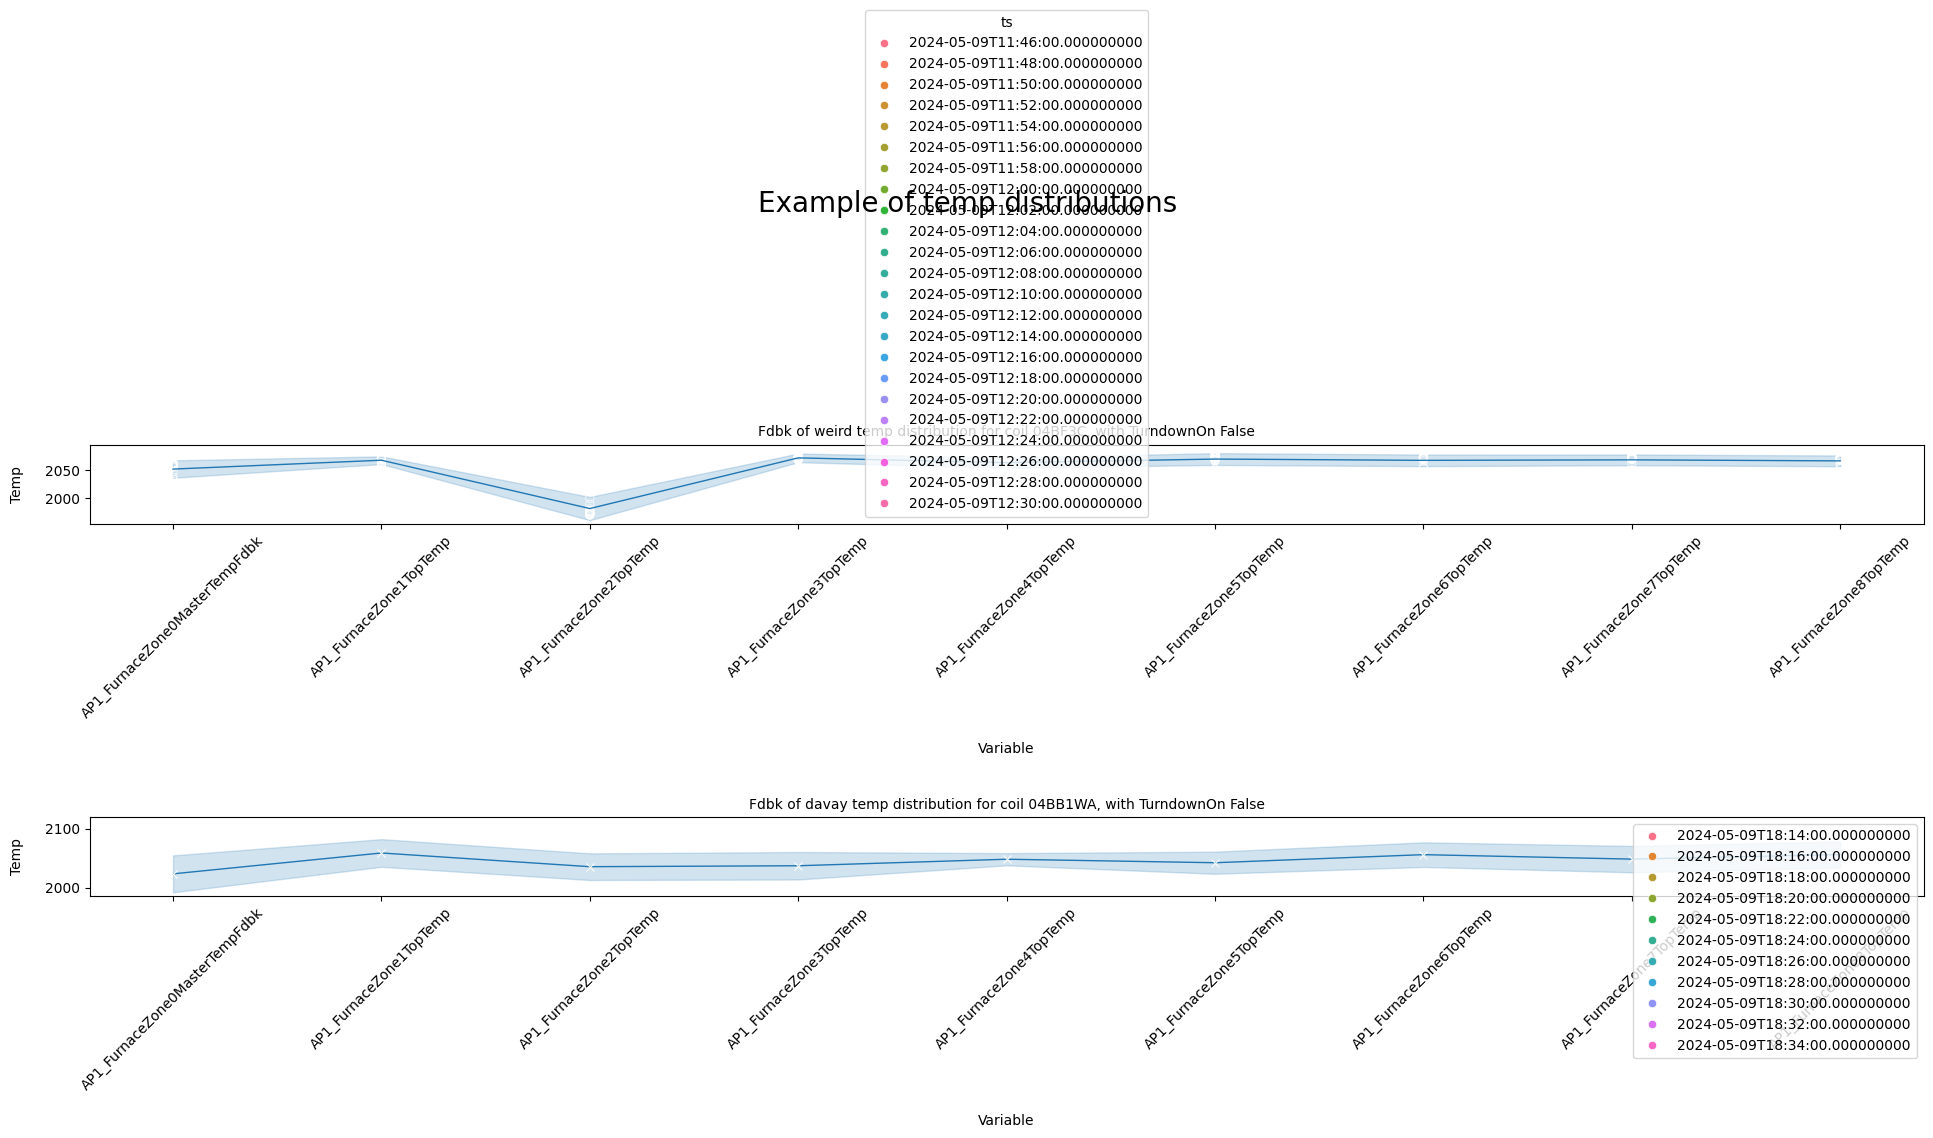

In [41]:
#Iterate all coils and count weird/davay distributions (include TurndownOn var to see if its related):len dfXY_coils!=dfXY bc of grades mismatches
#iterate timestamps of dfXY, not dfXY_coils
coil = dfXY_coils.loc[dfXY.index[0]]
time = dfXY.index[0]
tot=1
weirdList = []#(initime,endtime,coil,TurndownOn.bool)
davayList = []#(initime,endtime,coil,TurndownOn.bool)
for i,t in enumerate(dfXY.index):
    if dfXY_coils.loc[t] != coil: #new coil entered furnace
        #Long-format DF SP & Fdbk
        TempFdbk=pd.melt(dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
        TempSP=pd.melt(dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.*Temp.*Setpoint',regex=True)].reset_index(),id_vars=['ts'])
        
        if (TempFdbk.groupby(['variable']).mean('value').min()==TempFdbk.groupby(['variable']).mean('value').iloc[0]).value: #if shape not weird (Z0 is min)
            #Check if reason of weird shape is TurndownOn variable
            TurndownOn = dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.*TurndownOn',regex=True)].astype(np.float64).sum(axis=0).sum()>0#.apply(pd.unique,axis=0)
            davayList.append((time,dfXY.index[i-1],coil,TurndownOn))
            
        else: 
            #Check if reason of weird shape is TurndownOn variable
            TurndownOn = dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.*TurndownOn',regex=True)].astype(np.float64).sum(axis=0).sum()>0#.apply(pd.unique,axis=0)
            weirdList.append((time,dfXY.index[i-1],coil,TurndownOn))
        
        tot+=1
        coil = dfXY_coils.loc[t] #update coil in furnace
        time = t #update timeindex when actual coil enters furnace
        
    if i == dfXY.shape[0]-1: #Last row
        #Long-format DF SP & Fdbk
        TempFdbk=pd.melt(dfXY.loc[time:dfXY.index[i],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
        TempSP=pd.melt(dfXY.loc[time:dfXY.index[i],dfXY.columns.str.contains('.*Zone.*Temp.*Setpoint',regex=True)].reset_index(),id_vars=['ts'])

        if (TempFdbk.groupby(['variable']).mean('value').min()==TempFdbk.groupby(['variable']).mean('value').iloc[0]).value: #if shape not weird (Z0 is min)
            #Check if reason of weird shape is TurndownOn variable
            TurndownOn = dfXY.loc[time:dfXY.index[i],dfXY.columns.str.contains('.*Zone.*TurndownOn',regex=True)].astype(np.float64).sum(axis=0).sum()>0#.apply(pd.unique,axis=0)
            davayList.append((time,dfXY.index[i],coil,TurndownOn))
        else: 
            #Check if reason of weird shape is TurndownOn variable
            TurndownOn = dfXY.loc[time:dfXY.index[i],dfXY.columns.str.contains('.*Zone.*TurndownOn',regex=True)].astype(np.float64).sum(axis=0).sum()>0#.apply(pd.unique,axis=0)
            weirdList.append((time,dfXY.index[i],coil,TurndownOn))
        
if tot == len(weirdList)+len(davayList):
    print("There are {} weird temp distributions and {} davay distributions, which make a total of {}".format(len(weirdList),len(davayList),tot))
    print("There are {} unique coils".format(len(dfXY_coils.loc[dfXY.index].unique())))
else:
    print("WARNING: There are {} weird temp distributions and {} davay distributions, which make a total of {}".format(len(weirdList),len(davayList),len(weirdList)+len(davayList)))
    print("There are {} total temp distributions".format(tot))

#Print ex
fig,ax=plt.subplots(2,1,figsize=(20,10),facecolor='white')
fig.suptitle('Example of temp distributions',fontsize=20)
#Print an example of weird distribution
coil = weirdList[1]#first tuple (tini,tend,coil)
TempFdbkWeird=pd.melt(dfXY.loc[coil[0]:coil[1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
ax[0].set_title("Fdbk of weird temp distribution for coil {}, with TurndownOn {}".format(coil[2],coil[3]),fontsize=10)
sns.lineplot(data=TempFdbkWeird,x='variable',y='value',ax=ax[0],estimator=np.mean,lw=1,errorbar='sd')#,hue='variable'
sns.scatterplot(data=TempFdbkWeird,x='variable',y='value',ax=ax[0],markers={'s':20,'marker':'o'},hue='ts')#,hue='variable'
ax[0].set_ylabel("Temp",fontsize=10,labelpad=15)
ax[0].set_xlabel("Variable",fontsize=10,labelpad=15)
ax[0].tick_params('x', labelrotation=45)
#Print an example of davay distribution
coil = davayList[1]#first tuple (tini,tend,coil)
TempFdbkDavay=pd.melt(dfXY.loc[coil[0]:coil[1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
ax[1].set_title("Fdbk of davay temp distribution for coil {}, with TurndownOn {}".format(coil[2],coil[3]),fontsize=10)
sns.scatterplot(data=TempFdbkDavay,x='variable',y='value',ax=ax[1],markers={'s':20,'marker':'o'},hue='ts')#,hue='variable'
#sns.scatterplot(data=TempFdbkDavay.groupby("variable").mean().reset_index(),x='variable',y='value',ax=ax[1],marker='x',size=300,color='fuchsia')#,hue='variable','c':'black',markers={'s':80,'marker':'x'}
sns.lineplot(data=TempFdbkDavay,x='variable',y='value',ax=ax[1],estimator=np.mean,lw=1,errorbar='sd',markers=True,marker='x')#,hue='variable',color='red'
ax[1].set_ylabel("Temp",fontsize=10,labelpad=15)#,markers={'s':80,'marker':'x','color':'red'}
ax[1].set_xlabel("Variable",fontsize=10,labelpad=15)
#plt.xticks(rotation=45)
ax[1].tick_params('x', labelrotation=45)
fig.tight_layout(pad=3)
plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\EDAproject\images\MV\newTempRampSoak.png", bbox_inches="tight")

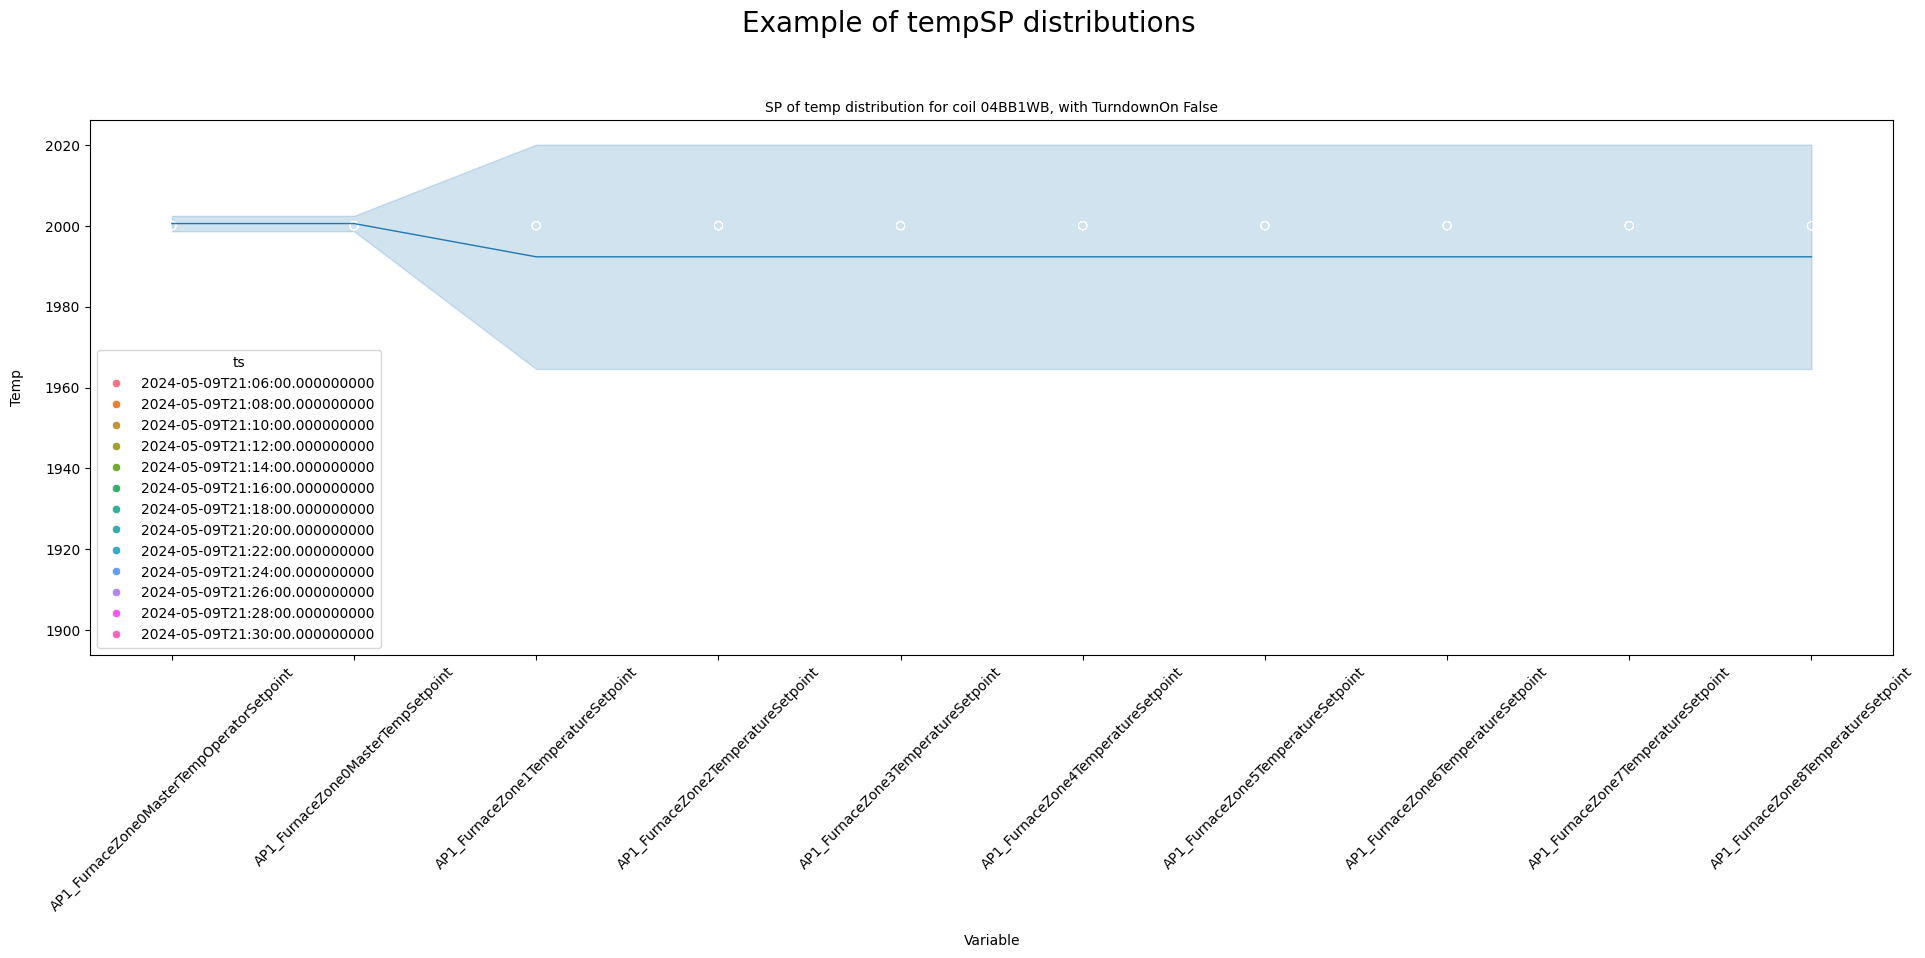

In [42]:
#SHOW TEM DISTRIBUTION FOR SP
#sns.scatterplot(data=TempFdbkDavay.groupby("variable").mean().reset_index(),x='variable',y='value',marker='x',size=200,color='fuchsia',markers={'s':200,'marker':'x'})#,hue='variable','c':'black'
coil = davayList[2]
TempSPDavay=pd.melt(dfXY.loc[coil[0]:coil[1],dfXY.columns.str.contains('.*Zone.*Temp.*Setpoint',regex=True)].reset_index(),id_vars=['ts'])
#TempFdbkDavay=pd.melt(dfXY.loc[coil[0]:coil[1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
fig,ax=plt.subplots(1,1,figsize=(20,10),facecolor='white')
fig.suptitle('Example of tempSP distributions',fontsize=20)
ax.set_title("SP of temp distribution for coil {}, with TurndownOn {}".format(coil[2],coil[3]),fontsize=10)
ax.set_ylabel("Temp",fontsize=10,labelpad=15)
ax.set_xlabel("Variable",fontsize=10,labelpad=15)
sns.lineplot(data=TempSPDavay,x='variable',y='value',ax=ax,estimator=np.mean,lw=1,errorbar='sd')#,hue='variable'
sns.scatterplot(data=TempSPDavay,x='variable',y='value',ax=ax,markers={'s':20,'marker':'o'},hue='ts')#,hue='variable'
plt.xticks(rotation=45)
fig.tight_layout(pad=3)

,AP1_FurnaceZone0MasterTempFdbk,AP1_FurnaceZone1TopTemp,AP1_FurnaceZone2TopTemp,AP1_FurnaceZone3TopTemp,AP1_FurnaceZone4TopTemp,AP1_FurnaceZone5TopTemp,AP1_FurnaceZone6TopTemp,AP1_FurnaceZone7TopTemp,AP1_FurnaceZone8TopTemp,rampFdbk,soakFdbk
SteelFamCluster,,,,,,,,,,,
HighGoal,1891.448521,2076.293094,2029.121801,2106.473656,2052.293175,2111.113073,2085.246292,2091.930826,2086.274889,184.844573,2078.924559
LowGoal,1373.593025,1925.707741,1899.501592,1930.968339,1911.865294,1929.096681,1922.452461,1814.749664,1812.487935,552.114716,1904.905967


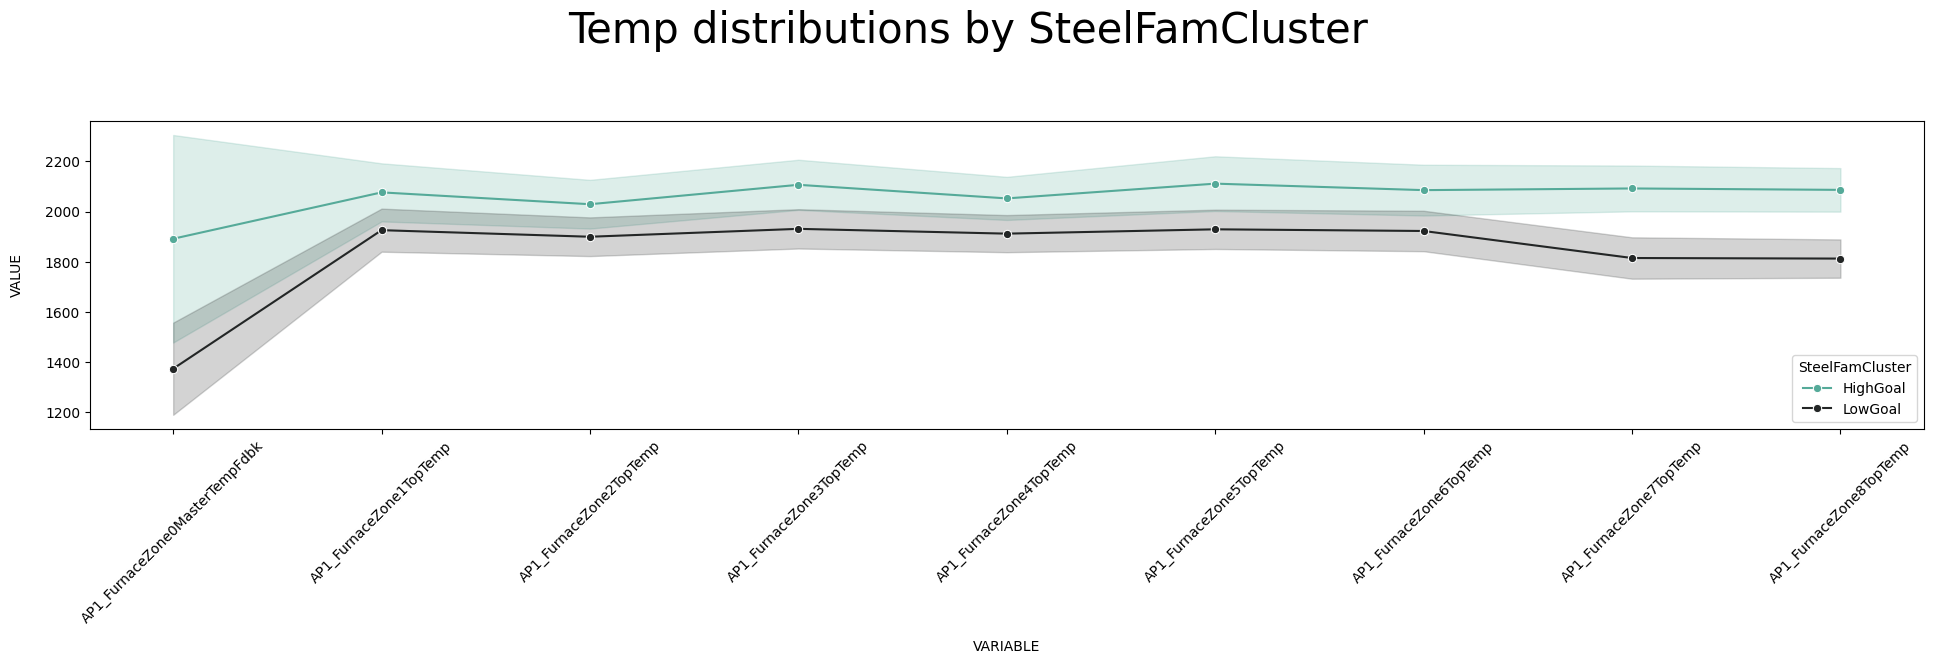

In [43]:
#SHOW TEM DISTRIBUTION AVERAGED BY STEELGRADEFAM (2 DISTRIBUTIONS): USE IT TO CREATE rampFdbk/soakFdbk VARIABLES
#TempFdbk=pd.melt(dfXY.loc[time:dfXY.index[i-1],dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk',regex=True)].reset_index(),id_vars=['ts'])
#dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").std().reset_index()
fig,axes=plt.subplots(figsize=(20,7))
#sns.lineplot(data=pd.melt(dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean().reset_index(),id_vars=['SteelFamCluster']),x='variable',y='value',hue='SteelFamCluster',lw=1,marker='o',errorbar='sd',markers=True,palette="dark:#5A9_r",ax=axes)#markers={'s':20,'marker':'o'}
dfRampSoak = dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]]#.groupby("SteelFamCluster").mean().reset_index()
sns.lineplot(data=pd.melt(dfRampSoak,id_vars=['SteelFamCluster']),x='variable',y='value',hue='SteelFamCluster',estimator=np.mean,err_style="band",errorbar='sd',markers=True,lw=1.5,marker='o',palette="dark:#5A9_r",ax=axes)#markers={'s':20,'marker':'o'}
fig.suptitle('Temp distributions by SteelFamCluster',fontsize=30)
axes.tick_params(axis='x', labelsize=10)
axes.tick_params(axis='y', labelsize=10)
axes.set_xlabel("VARIABLE",fontsize=10,labelpad=10)
axes.set_ylabel("VALUE",fontsize=10,labelpad=15)
plt.xticks(rotation=45)
fig.tight_layout(pad=3)
plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\EDAproject\images\MV\newAvgTempRampSoak.png", bbox_inches="tight")

#Add variables to dfXY
dfRampSoak = dfRampSoak.groupby("SteelFamCluster").mean().reset_index()
dfRampSoak = dfXY[dfXY.columns[dfXY.columns.str.contains('.*Zone.TopTemp|AP1_FurnaceZone0MasterTempFdbk|SteelFamCluster',regex=True)]].groupby("SteelFamCluster").mean()#.reset_index()
dfRampSoak["rampFdbk"] = dfRampSoak.apply(lambda x: x["AP1_FurnaceZone1TopTemp"]-x["AP1_FurnaceZone0MasterTempFdbk"],axis=1)
dfRampSoak["soakFdbk"] = dfRampSoak.iloc[:,1:-2].mean(axis=1)

dfXY.loc[:,"rampFdbk"] = dfXY.loc[:,"SteelFamCluster"].cat.rename_categories({"HighGoal":1,"LowGoal":0}).astype(float)
dfXY.loc[:,'rampFdbk']=pd.DataFrame(dfXY["rampFdbk"].map(lambda y: dfRampSoak.loc["HighGoal","rampFdbk"] if y==1 else dfRampSoak.loc["LowGoal","rampFdbk"])) 

dfXY.loc[:,"soakFdbk"] = dfXY.loc[:,"SteelFamCluster"].cat.rename_categories({"HighGoal":1,"LowGoal":0}).astype(float)
dfXY.loc[:,'soakFdbk']=pd.DataFrame(dfXY["soakFdbk"].map(lambda y: dfRampSoak.loc["HighGoal","soakFdbk"] if y==1 else dfRampSoak.loc["LowGoal","soakFdbk"]))
dfRampSoak

## Create TurndownOn compressed column

In [44]:
TurnDownOn = dfXY[dfXY.columns[dfXY.columns.str.contains('.*TurndownOn',regex=True)]].copy()
TurnDownOnCompressed=(dfXY[dfXY.columns[dfXY.columns.str.contains('.*TurndownOn',regex=True)]]==1).sum(axis=1).astype(np.int64).map(lambda x: int(1) if (x>0) else int(x),na_action='ignore').astype("category")
dfXY.drop(dfXY.columns[dfXY.columns.str.contains('.*TurndownOn',regex=True)],axis=1,inplace=True)
dfXY = pd.merge(left=dfXY,right=pd.DataFrame(TurnDownOnCompressed,columns=['TurnDownOnCompressed'],dtype="category"),how='inner',right_index=True,left_index=True)
dfXY.head(1)

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,NetWeight,grade,pyro2,SteelFamCluster,AP1_FurnaceCoilID,WidthFamCluster,CSdeltaTmin,rampFdbk,soakFdbk,TurnDownOnCompressed
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.014615,2.0,373.529572,0.0,370.505768,1700.0,124.969482,...,69160.0,120,1980.0,HighGoal,04BF4N,1.0,1.280313,184.844573,2078.924559,0


In [45]:
#Check no duplicated values introduced
dfXY.isna().sum(axis=0)
dfXY.index.duplicated().sum()

0

## Final outlier detection

In [46]:
#Remove outliers when LineSpeed=0
for t in dfXY.index:
    if (dfXY.loc[t,"AP1_FurnaceLineSpeed"]==0) | (np.isnan(dfXY.loc[t,"AP1_FurnaceLineSpeed"])):
        dfXY.loc[t,dfXY.columns[~dfXY.columns.str.contains("AP1_FurnaceLineSpeed")]] = np.nan
dfXY.isna().sum(axis=0)

AP1_FurnaceThickness                        1222
AP1_FurnaceWidth                            1222
AP1_FurnaceCombustionAirPressureCV          1222
AP1_FurnaceCombustionAirPressureFeedback    1222
AP1_FurnaceCombustionAirPressureSetPoint    1222
                                            ... 
WidthFamCluster                             1222
CSdeltaTmin                                 1222
rampFdbk                                    1222
soakFdbk                                    1222
TurnDownOnCompressed                        1222
Length: 182, dtype: int64

In [47]:
CSdeltaTmin_describe=pd.DataFrame(dfXY.CSdeltaTmin.describe())
CSdeltaTmin_describe.loc["cut-","CSdeltaTmin"]=CSdeltaTmin_describe.loc["mean","CSdeltaTmin"]-3*CSdeltaTmin_describe.loc["std","CSdeltaTmin"]
CSdeltaTmin_describe.loc["cut+","CSdeltaTmin"]=CSdeltaTmin_describe.loc["mean","CSdeltaTmin"]+3*CSdeltaTmin_describe.loc["std","CSdeltaTmin"]
CSdeltaTmin_describe
tbl_desc.loc[:,"CSdeltaTmin"]=CSdeltaTmin_describe
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2,CSdeltaTmin
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,20685.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991,1.779170
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182,26.028097
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000,0.727192
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000,0.963884
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000,1.269767
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000,1.748365
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000,2620.799836
cut-,0.000000,0.000000,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,0.000000,...,0.000000,0.000000,0.000000,1309.246645,0.000000,36.444376,0.000000,5000.000000,1499.740445,-76.305120
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,4.000000,100.000000,162.647455,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538,79.863461


In [48]:
#Tune cut
for c in range(tbl_desc.shape[1]):
    if tbl_desc.loc['cut-',tbl_desc.columns[c]]<0:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
    if tbl_desc.columns[c]=='AP1_FurnaceWidth':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0 #some widthIDs are smaller than the actual cut-
    elif tbl_desc.columns[c]=='NetWeight':
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=5000 #min around 20k, if cut for defects would be 10k. To be conservative 5k
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains('Ratio',regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=4
    elif tbl_desc.columns[c] in tbl_desc.columns[tbl_desc.columns.str.contains("P1_FurnaceZone.*[C].*[V].*",regex=True)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100 #CV vars are in %
    elif  tbl_desc.columns[c] in zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains("Zone0",regex=False) & ~zoneAirGas_vars_series.str.contains("Ratio",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=0
        tbl_desc.loc['cut+',tbl_desc.columns[c]]=100 #Zone0 airgas vars are in %
    elif tbl_desc.columns[c] in zoneTemp_vars_series[~zoneTemp_vars_series.str.contains("CV",regex=False)]:
        if tbl_desc.loc['cut-',tbl_desc.columns[c]]<=500:
            tbl_desc.loc['cut-',tbl_desc.columns[c]]=500 #Zone 0 seems to have many values near 0 that are outside the bell
    elif tbl_desc.columns[c] in pyro_vars_series[pyro_vars_series.str.contains("Temp",regex=False)]:
        tbl_desc.loc['cut-',tbl_desc.columns[c]]=1400 #pyro sensors seem to have many values at 1200 that are outside the bimodal bell, p() bc it is the lower limit of the sensor
tbl_desc

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,AP1_FurnaceZone8TopAirGasRatioSetpoint,AP1_FurnaceZone8TopGasFlowControlValveOutput,AP1_FurnaceZone8TopGasFlowFeedback,AP1_FurnaceZone8TopTemp,CurrentGuage,CurrentWidth,CoilLength,NetWeight,pyro2,CSdeltaTmin
count,21907.000000,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,21907.0,21907.000000,...,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,21907.000000,20685.000000
mean,0.069078,56.306751,100.0,1.115239,2.0,432.273056,0.0,426.635041,1700.0,119.571943,...,1.199973,35.152377,58.004930,1977.255034,0.069087,56.478689,6286.391080,62566.733008,1896.040991,1.779170
std,0.037422,6.621839,0.0,0.249432,0.0,68.166932,0.0,65.338182,0.0,50.965182,...,0.002340,15.179243,34.880842,222.669463,0.037437,6.678104,3458.378325,9415.245745,132.100182,26.028097
min,0.022000,37.000000,100.0,0.691062,2.0,157.215286,0.0,160.497681,1700.0,0.000000,...,1.000000,5.000000,0.096140,873.977173,0.022000,36.770200,1323.600000,15630.000000,1640.000000,0.727192
25%,0.034500,49.000000,100.0,0.904534,2.0,401.665817,0.0,398.300049,1700.0,84.310143,...,1.200000,21.441599,21.882601,1852.681152,0.034500,49.286200,3284.400000,57150.000000,1900.000000,0.963884
50%,0.057500,61.000000,100.0,1.095340,2.0,461.863647,0.0,454.599518,1700.0,121.916977,...,1.200000,37.638889,62.242664,2052.666260,0.057500,61.254300,5575.900000,66070.000000,1980.000000,1.269767
75%,0.101500,61.000000,100.0,1.315594,2.0,478.798187,0.0,470.602295,1700.0,164.133095,...,1.200000,50.737694,96.833939,2127.128540,0.101500,61.411700,9113.400000,70450.000000,1980.000000,1.748365
max,0.176000,63.000000,100.0,1.728980,2.0,532.595581,0.0,524.375061,1700.0,220.024429,...,1.200000,100.000000,101.474057,2214.954834,0.176000,62.868400,14958.600000,72930.000000,1990.000000,2620.799836
cut-,0.000000,0.000000,100.0,0.366942,2.0,227.772258,0.0,230.620495,1700.0,0.000000,...,0.000000,0.000000,0.000000,1309.246645,0.000000,36.444376,0.000000,5000.000000,1499.740445,0.000000
cut+,0.181344,76.172267,100.0,1.863536,2.0,636.773853,0.0,622.649587,1700.0,272.467490,...,4.000000,100.000000,162.647455,2645.263423,0.181400,76.513001,16661.526056,90812.470242,2292.341538,79.863461


In [49]:
#Remove outliers from CSdeltaTmin
dfXY.loc[:,"CSdeltaTmin"]=dfXY.loc[:,"CSdeltaTmin"].map(lambda x: x if ((x>=tbl_desc.loc["cut-","CSdeltaTmin"]) & (x<=tbl_desc.loc["cut+","CSdeltaTmin"])) else np.nan,na_action='ignore')
dfXY.isna().sum(axis=0)

AP1_FurnaceThickness                        1222
AP1_FurnaceWidth                            1222
AP1_FurnaceCombustionAirPressureCV          1222
AP1_FurnaceCombustionAirPressureFeedback    1222
AP1_FurnaceCombustionAirPressureSetPoint    1222
                                            ... 
WidthFamCluster                             1222
CSdeltaTmin                                 1225
rampFdbk                                    1222
soakFdbk                                    1222
TurnDownOnCompressed                        1222
Length: 182, dtype: int64

## Group analysis

In [50]:
#Numeric vars
numerical_var_series=dfXY[dfXY.columns[dfXY.dtypes == np.float64]].columns#.to_list()#[0:5]
print(type(numerical_var_series))
print(len(numerical_var_series))
numerical_var_series

<class 'pandas.core.indexes.base.Index'>
176


Index(['AP1_FurnaceThickness', 'AP1_FurnaceWidth',
       'AP1_FurnaceCombustionAirPressureCV',
       'AP1_FurnaceCombustionAirPressureFeedback',
       'AP1_FurnaceCombustionAirPressureSetPoint',
       'AP1_FurnaceCombustionAirTempFurnace',
       'AP1_FurnaceDilutionAirTemperatureCV',
       'AP1_FurnaceDilutionAirTemperatureFeedback',
       'AP1_FurnaceDilutionAirTemperatureSetPoint', 'AP1_FurnaceLineSpeed',
       ...
       'AP1_FurnaceZone8TopGasFlowFeedback', 'AP1_FurnaceZone8TopTemp',
       'CurrentGuage', 'CurrentWidth', 'CoilLength', 'NetWeight', 'pyro2',
       'CSdeltaTmin', 'rampFdbk', 'soakFdbk'],
      dtype='object', length=176)

In [51]:
#Categorical vars
categorical_var=dfXY[dfXY.columns[dfXY.dtypes == "category"]].columns
print(type(categorical_var))
print(len(categorical_var))
categorical_var

<class 'pandas.core.indexes.base.Index'>
5


Index(['AP1_FurnaceWeldInFurnace', 'grade', 'SteelFamCluster',
       'WidthFamCluster', 'TurnDownOnCompressed'],
      dtype='object')

In [52]:
proceso_vars_series

Index(['CurrentGuage', 'CurrentWidth', 'CoilLength', 'NetWeight'], dtype='object')

In [53]:
# dfXY_mx=dfXY.corr()
# sns.heatmap(dfXY_mx, annot=True, cmap='Blues')

In [54]:
dfXY=np.round(dfXY,2)
dfXY.head(1)

,AP1_FurnaceThickness,AP1_FurnaceWidth,AP1_FurnaceCombustionAirPressureCV,AP1_FurnaceCombustionAirPressureFeedback,AP1_FurnaceCombustionAirPressureSetPoint,AP1_FurnaceCombustionAirTempFurnace,AP1_FurnaceDilutionAirTemperatureCV,AP1_FurnaceDilutionAirTemperatureFeedback,AP1_FurnaceDilutionAirTemperatureSetPoint,AP1_FurnaceLineSpeed,...,NetWeight,grade,pyro2,SteelFamCluster,AP1_FurnaceCoilID,WidthFamCluster,CSdeltaTmin,rampFdbk,soakFdbk,TurnDownOnCompressed
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-09 08:40:00,0.04,61.0,100.0,1.01,2.0,373.53,0.0,370.51,1700.0,124.97,...,69160.0,120,1980.0,HighGoal,04BF4N,1.0,1.28,184.84,2078.92,0


In [55]:
#Define func avg zones of furnace
def func_get_dataReg(data:pd.DataFrame):# Expects [pyro2,pyro2Fdbk,zones], where data=df[pyro,pyroFdbk,zones].groupby(pyro2).mean().reset_index()
    dataF=data.iloc[:,[0,1,2]].rename(columns={data.columns[2]:'X'})
    for i in range(3,data.shape[1]):
        data1=data.iloc[:,[0,1,i]].rename(columns={data.columns[i]:'X'})
        dataF=pd.concat([dataF,data1],axis=0)
    return dataF.groupby("pyro2").mean().reset_index()#Returns the mean value of all vars (avg the furnace zones) for each pyro2goal [pyro2,pyro2Fdbk,X].

In [56]:
#Define func avg Bottom\Top by Zone
def func_avg_zone(l:list):#Averages Top/Bottom values for each zone
    df=pd.DataFrame(np.zeros((dfXY.shape[0],len(l)//2)))
    df.iloc[:,:]=np.nan
    i=0
    j=0
    while i < len(l)//2:#j<9
        df.iloc[:,i]=dfXY.loc[:,[l[j],l[j+1]]].mean(axis=1)
        #print("{} vs {}".format(l[j],l[j+1]))
        j+=2
        i+=1
    df=pd.concat([df.reset_index(drop=True),pd.DataFrame(dfXY[["AP1_FurnacePyro2Temp","grade","TurnDownOnCompressed","WidthFamCluster","SteelFamCluster"]].reset_index(drop=True))],axis=1)
    df.columns=["Zone0","Zone1","Zone2","Zone3","Zone4","Zone5","Zone6","Zone7","Zone8","AP1_FurnacePyro2Temp","grade","TurnDownOnCompressed","WidthFamCluster","SteelFamCluster"]
    return df

if None:
    print("None")
    
if ["hdgsiu","skudgs"]:
    print("List")
a=pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]}).rename(columns={"A":"Peepe"})[["Peepe","B","B"]]
a.loc[:,~a.columns.duplicated()]
a.loc[:,["Peepe"]]#.columns.duplicated()

In [57]:
#Define func plot regression
def func_plot_reg(nrow:int,ncol:int,ylist:list,x1list:list,x2list:list=None,ylabel:str=None,x1label:str=None,x2label:str=None,Zone:bool=False,Avg:bool=False,totlist:list=None,title:str="scatter",kde:bool=False):
    if totlist:
        tot=totlist
        T=True
    else: 
        T=False 
        tot=[0]#no tot plotted
    t=0
    col=ncol
    row=nrow
    #row=(len(zone)//col+1)+2#+2 for the 2 scatterplots of SP/Fdbk of all zones integrated
    hue = ["grade","TurnDownOnCompressed","WidthFamCluster","SteelFamCluster"]
    X1 = True
    
    zone=["Zone0","Zone1","Zone2","Zone3","Zone4","Zone5","Zone6","Zone7","Zone8"]
    z=0
    
    #Initialize values
    scatter=dfXY[ylist+x1list]
    reg=dfXY[ylist+x1list]
    scatter2=dfXY[ylist+x1list]
    reg2=dfXY[ylist+x1list]
    onevsone=False
    onevsn=False
    n1vsm_ZA=False

    #Check if its 1vs1, 1vsn noZone or 1vsn Zone
    if Zone & Avg:#nvsm,1vsn Zone & Avg
        scatter=pd.concat([pd.DataFrame(dfXY[ylist+["pyro2"]].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,:]],axis=1)
        scatter=scatter.loc[:,~scatter.columns.duplicated()]
        reg=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
        reg=reg.loc[:,~reg.columns.duplicated()].groupby("pyro2").mean().reset_index()#.iloc[:,[0,19]+list(range(1,19))]
        n1vsm_ZA=True
        if len(ylist)==1:
            scatter.rename(columns={ylist[0]:"Y"},inplace=True)
            reg.rename(columns={ylist[0]:"Y"},inplace=True)
        if x2list:
            scatter2=pd.concat([pd.DataFrame(dfXY[ylist+["pyro2"]].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,:]],axis=1)
            scatter2=scatter2.loc[:,~scatter2.columns.duplicated()]
            reg2=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
            reg2=reg2.loc[:,~reg2.columns.duplicated()].groupby("pyro2").mean().reset_index()#.iloc[:,[0,19]+list(range(1,19))]
            if len(ylist)==1:
                scatter2.rename(columns={ylist[0]:"Y"},inplace=True)
                reg2.rename(columns={ylist[0]:"Y"},inplace=True)
    elif (~Zone) & (x2list==None):#(1vs1, 1vsn) noZone
        if (len(ylist)==1) & (len(x1list)==1):#1vs1 noZone
            zone=hue.copy()
            onevsone=True
            reg=dfXY[["pyro2"]+ylist+x1list]
            reg=reg.loc[:,~reg.columns.duplicated()].groupby("pyro2").mean().reset_index().rename(columns={ylist[0]:"Y",x1list[0]:"X"})
        elif (len(ylist)>1) & (len(x1list)>1):#mean(m)vsn noZone (tempvsX)
            onevsn=True
            zone=x1list.copy()
            scatter=pd.concat([pd.DataFrame(dfXY[ylist].mean(axis=1),columns=["Y"]),dfXY[zone+hue]],axis=1)
            reg=pd.concat([pd.DataFrame(dfXY[ylist].mean(axis=1),columns=["Y"]),dfXY[zone+["pyro2"]]],axis=1).groupby("pyro2").mean().reset_index()#.iloc[:,[len(zone)-1+2]+list(range(len(zone)-1+2))].groupby(...
        elif (len(ylist)==1) & (len(x1list)>1):#1vsn (pyro2vsX)
            onevsn=True
            zone=x1list.copy()
            scatter=(dfXY[["pyro2"]+ylist+x1list+hue])
            scatter=scatter.loc[:,~scatter.columns.duplicated()].rename(columns={ylist[0]:"Y"})
            reg=(dfXY[["pyro2"]+ylist+x1list])
            reg=reg.loc[:,~reg.columns.duplicated()].groupby("pyro2").mean().reset_index().rename(columns={ylist[0]:"Y"})
            
    #Remove duplicated columns added twice
    scatter=scatter.loc[:,~scatter.columns.duplicated()]
    reg=reg.loc[:,~reg.columns.duplicated()]
    scatter2=scatter2.loc[:,~scatter2.columns.duplicated()]
    reg2=reg2.loc[:,~reg2.columns.duplicated()]
    
    fig,axes = plt.subplots(row,col,figsize=(20,(row*20/5)+2),facecolor='white')
    fig.suptitle("{} by {}".format(title,hue[3]),fontsize=30)
    for r in range(row):
        for c in range(col):
            if z<len(zone):
                if X1:
                    if n1vsm_ZA:#nvsm,1vsn Zone and Avg
                        if len(ylist)==1:
                            sns.scatterplot(data=scatter,x=zone[z],y="Y",ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
                            if kde & (scatter[zone[z]].std()!=0) & (scatter["Y"].std()!=0):
                                sns.kdeplot(data=scatter,x=zone[z],y="Y",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
                            sns.regplot(data=reg,x=zone[z],y="Y",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}
                            if (len(reg.Y.unique())>1) & (len(reg[zone[z]].unique())>1):
                                nan = np.logical_or(reg.Y.isna().to_numpy(), reg[zone[z]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                                axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(reg.Y[~nan],reg[zone[z]][~nan])[0]**2,st.pearsonr(reg.Y[~nan],reg[zone[z]][~nan])[1])],fontsize='large')
                        else:
                            sns.scatterplot(data=scatter,x=zone[z],y=ylist[z],ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
                            if kde & (scatter[zone[z]].std()!=0) & (scatter[ylist[z]].std()!=0):
                                sns.kdeplot(data=scatter,x=zone[z],y=ylist[z],levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
                            sns.regplot(data=reg,x=zone[z],y=ylist[z],ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}
                            if (len(reg[ylist[z]].unique())>1) & (len(reg[zone[z]].unique())>1):
                                nan = np.logical_or(reg[ylist[z]].isna().to_numpy(), reg[zone[z]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                                axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(reg[ylist[z]][~nan],reg[zone[z]][~nan])[0]**2,st.pearsonr(reg[ylist[z]][~nan],reg[zone[z]][~nan])[1])],fontsize='large')
                            
                    elif onevsn:#mean(Y)vsn or 1vsn
                        sns.scatterplot(scatter,x=zone[z],y="Y",ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
                        if kde & (scatter[zone[z]].std()!=0) & (scatter["Y"].std()!=0):
                            sns.kdeplot(data=scatter,x=zone[z],y="Y",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
                        sns.regplot(data=reg,x=zone[z],y="Y",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}  
                        if (len(reg.Y.unique())>1) & (len(reg[zone[z]].unique())>1):
                            nan = np.logical_or(reg.Y.isna().to_numpy(), reg[zone[z]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(reg.Y[~nan],reg[zone[z]][~nan])[0]**2,st.pearsonr(reg.Y[~nan],reg[zone[z]][~nan])[1])],fontsize='large')
                    elif onevsone:
                        sns.scatterplot(dfXY,x=x1list[0],y=ylist[0],ax=axes[r,c],hue=hue[z])#,size=20
                        #sns.kdeplot(data=scatter,x=x1list[0],y=ylist[0],levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
                        sns.regplot(data=reg,x="X",y="Y",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}  
                        if (len(reg.Y.unique())>1) & (len(reg.X.unique())>1):
                            nan = np.logical_or(reg.Y.isna().to_numpy(), reg.X.isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(reg.Y[~nan],reg.X[~nan])[0]**2,st.pearsonr(reg.Y[~nan],reg.X[~nan])[1])],fontsize='large')
                    #axes[r,c].set_ylim(1000,2400)
                    #axes[r,c].set_title(label='Pyro2 vs {} by {}'.format(var[v],hue[3]),loc='center',pad=10,fontsize=20)
                    axes[r,c].set_title(label='{}'.format(zone[z]),loc='center',pad=10,fontsize=17)
                    axes[r,c].set_xlabel(xlabel=x1label,labelpad=10,fontsize='x-large')
                    axes[r,c].set_ylabel(ylabel=ylabel,labelpad=10,fontsize='x-large')

                    if x2list:
                        X1=False
                    else: z+=1
                else:#X2
                    if len(ylist)==1:
                        sns.scatterplot(data=scatter2,x=zone[z],y="Y",ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
                        if kde & (scatter[zone[z]].std()!=0) & (scatter["Y"].std()!=0):
                            sns.kdeplot(data=scatter,x=zone[z],y="Y",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
                        sns.regplot(data=reg2,x=zone[z],y="Y",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}
                        if (len(reg2.Y.unique())>1) & (len(reg2[zone[z]].unique())>1):
                            nan = np.logical_or(reg2.Y.isna().to_numpy(), reg2[zone[z]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(reg2.Y[~nan],reg2[zone[z]][~nan])[0]**2,st.pearsonr(reg2.Y[~nan],reg2[zone[z]][~nan])[1])],fontsize='large')
                    else:
                        sns.scatterplot(data=scatter2,x=zone[z],y=ylist[z],ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
                        if kde & (scatter[zone[z]].std()!=0) & (scatter[ylist[z]].std()!=0):
                            sns.kdeplot(data=scatter,x=zone[z],y=ylist[z],levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
                        sns.regplot(data=reg2,x=zone[z],y=ylist[z],ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}
                        if (len(reg2[ylist[z]].unique())>1) & (len(reg2[zone[z]].unique())>1):
                            nan = np.logical_or(reg2[ylist[z]].isna().to_numpy(), reg2[zone[z]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(reg2[ylist[z]][~nan],reg2[zone[z]][~nan])[0]**2,st.pearsonr(reg2[ylist[z]][~nan],reg2[zone[z]][~nan])[1])],fontsize='large')
                    #axes[r,c].set_title(label='Pyro2 vs {} by {}'.format(var[v],hue[3]),loc='center',pad=10,fontsize=20)
                    axes[r,c].set_title(label='{}'.format(zone[z]),loc='center',pad=10,fontsize=17)
                    axes[r,c].set_xlabel(xlabel=x2label,labelpad=10,fontsize='x-large')
                    axes[r,c].set_ylabel(ylabel=ylabel,labelpad=10,fontsize='x-large')
                    
                    X1=True
                    z+=1
                    
                axes[r,c].tick_params(axis='x', labelsize=15)
                axes[r,c].tick_params(axis='y', labelsize=15)
                #axes[r,c].set_ylim(1000,2400)
                #print(z>=len(zone),t<len(tot),T)
            elif ((z>=len(zone)) & (t<len(tot)) & T): #Print SP/Fdbk zones alltoguether

                #print("In Tot")
                if t==0:
                    scatter=pd.concat([pd.DataFrame(dfXY[ylist+["pyro2"]].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,:]],axis=1)
                    scatter=scatter.loc[:,~scatter.columns.duplicated()]
                    for v,variable in enumerate(zone):
                        if len(ylist)>1:
                            sns.scatterplot(data=scatter,x=variable,y=ylist[v],ax=axes[r,c],hue=hue[3])#,size=2
                        else:
                            sns.scatterplot(data=scatter,x=variable,y=ylist[0],ax=axes[r,c],hue=hue[3])#,size=2
                    if len(ylist)>1:#Temp    
                        Y=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        Y=func_get_dataReg(Y.loc[:,~Y.columns.duplicated()].groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,:11]).X
                        X=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        X=func_get_dataReg(X.loc[:,~X.columns.duplicated()].groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,[0,1]+list(range(11,20))]).X
                    else:#pyro2
                        Y=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        Y=Y.loc[:,~Y.columns.duplicated()].groupby("pyro2").mean().reset_index().loc[:,ylist[0]]
                        X=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x1list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        X=func_get_dataReg(X.loc[:,~X.columns.duplicated()].groupby("pyro2").mean().reset_index().iloc[:,:]).X
                    sns.regplot(x=X,y=Y,ax=axes[r,c],color='black',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20} 
                    if (len(X.unique())>1) & (len(Y.unique())>1):
                        nan = np.logical_or(Y.isna().to_numpy(), X.isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                        axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(Y[~nan],X[~nan])[0]**2,st.pearsonr(Y[~nan],X[~nan])[1])],fontsize='medium')
                    else: axes[r,c].legend([hue[3]],loc='best')
                elif t==1:
                    scatter=pd.concat([pd.DataFrame(dfXY[ylist+["pyro2"]].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,:]],axis=1)
                    scatter=scatter.loc[:,~scatter.columns.duplicated()]
                    for v,variable in enumerate(zone):
                        if len(ylist)>1:
                            sns.scatterplot(data=scatter,x=variable,y=ylist[v],ax=axes[r,c],hue=hue[3])#,size=2
                        else:
                            sns.scatterplot(data=scatter,x=variable,y=ylist[0],ax=axes[r,c],hue=hue[3])#,size=2
                    
                    if len(ylist)>1:#Temp    
                        Y=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        Y=func_get_dataReg(Y.loc[:,~Y.columns.duplicated()].groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,:11]).X
                        X=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        X=func_get_dataReg(X.loc[:,~X.columns.duplicated()].groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,[0,1]+list(range(11,20))]).X
                    else:#pyro2
                        Y=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        Y=Y.loc[:,~Y.columns.duplicated()].groupby("pyro2").mean().reset_index().loc[:,ylist[0]]
                        X=pd.concat([pd.DataFrame(dfXY[["pyro2"]+ylist].reset_index(drop=True)),func_avg_zone(x2list).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1)
                        X=func_get_dataReg(X.loc[:,~X.columns.duplicated()].groupby("pyro2").mean().reset_index().iloc[:,:]).X
                    sns.regplot(x=X,y=Y,ax=axes[r,c],color='black',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}   
                    if (len(X.unique())>1) & (len(Y.unique())>1):
                        nan = np.logical_or(Y.isna().to_numpy(), X.isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                        axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(Y[~nan],X[~nan])[0]**2,st.pearsonr(Y[~nan],X[~nan])[1])],fontsize='medium')
                    else: axes[r,c].legend([hue[3]],loc='best')
                axes[r,c].set_title(label='{}'.format(tot[t]),loc='center',pad=10,fontsize=17)
                axes[r,c].set_xlabel(xlabel=tot[t],labelpad=10,fontsize='x-large')
                axes[r,c].set_ylabel(ylabel=ylabel,labelpad=10,fontsize='x-large')
                axes[r,c].tick_params(axis='x', labelsize=15)
                axes[r,c].tick_params(axis='y', labelsize=15)
                #axes[r,c].legend([hue[3]],loc='best')#,loc='best',hue[3]
                #axes.legend(zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*|.*Setpoint.*",regex=True)].tolist())#If not hue, show by zone
                t+=1
                
            #remove unused axes
            #print(len(axes[r,c].get_children()))
            if len(axes[r,c].get_children()) <=10:#empty plots have 10 children
                axes[r,c].set_visible(False)
                
    fig.tight_layout(pad=3)
    sns.set_style("darkgrid")
    
    plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\EDAproject\images\MV\newTry{}.png".format(title), bbox_inches="tight")
#

# #ZoneTempFdbk vs zone AirFlow: avg Bottom/Top
# varAirSP=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("AirFlow.*Set[Pp]oint.*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*",regex=True))].tolist()
# varAir=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("AirFlow",regex=False), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*|.*Set[Pp]oint.*",regex=True))].tolist()
# Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
# tot=["Total AirFlowSP","Total AirFlowFdbk"]
# col=3
# row=7
# 
# func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=varAirSP,x1label="AirFlowSP",x2list=varAir,x2label="AirFlow",nrow=row,ncol=col,Zone=True,totlist=tot,tile="scatter")

### pyro2goal vs pyro2

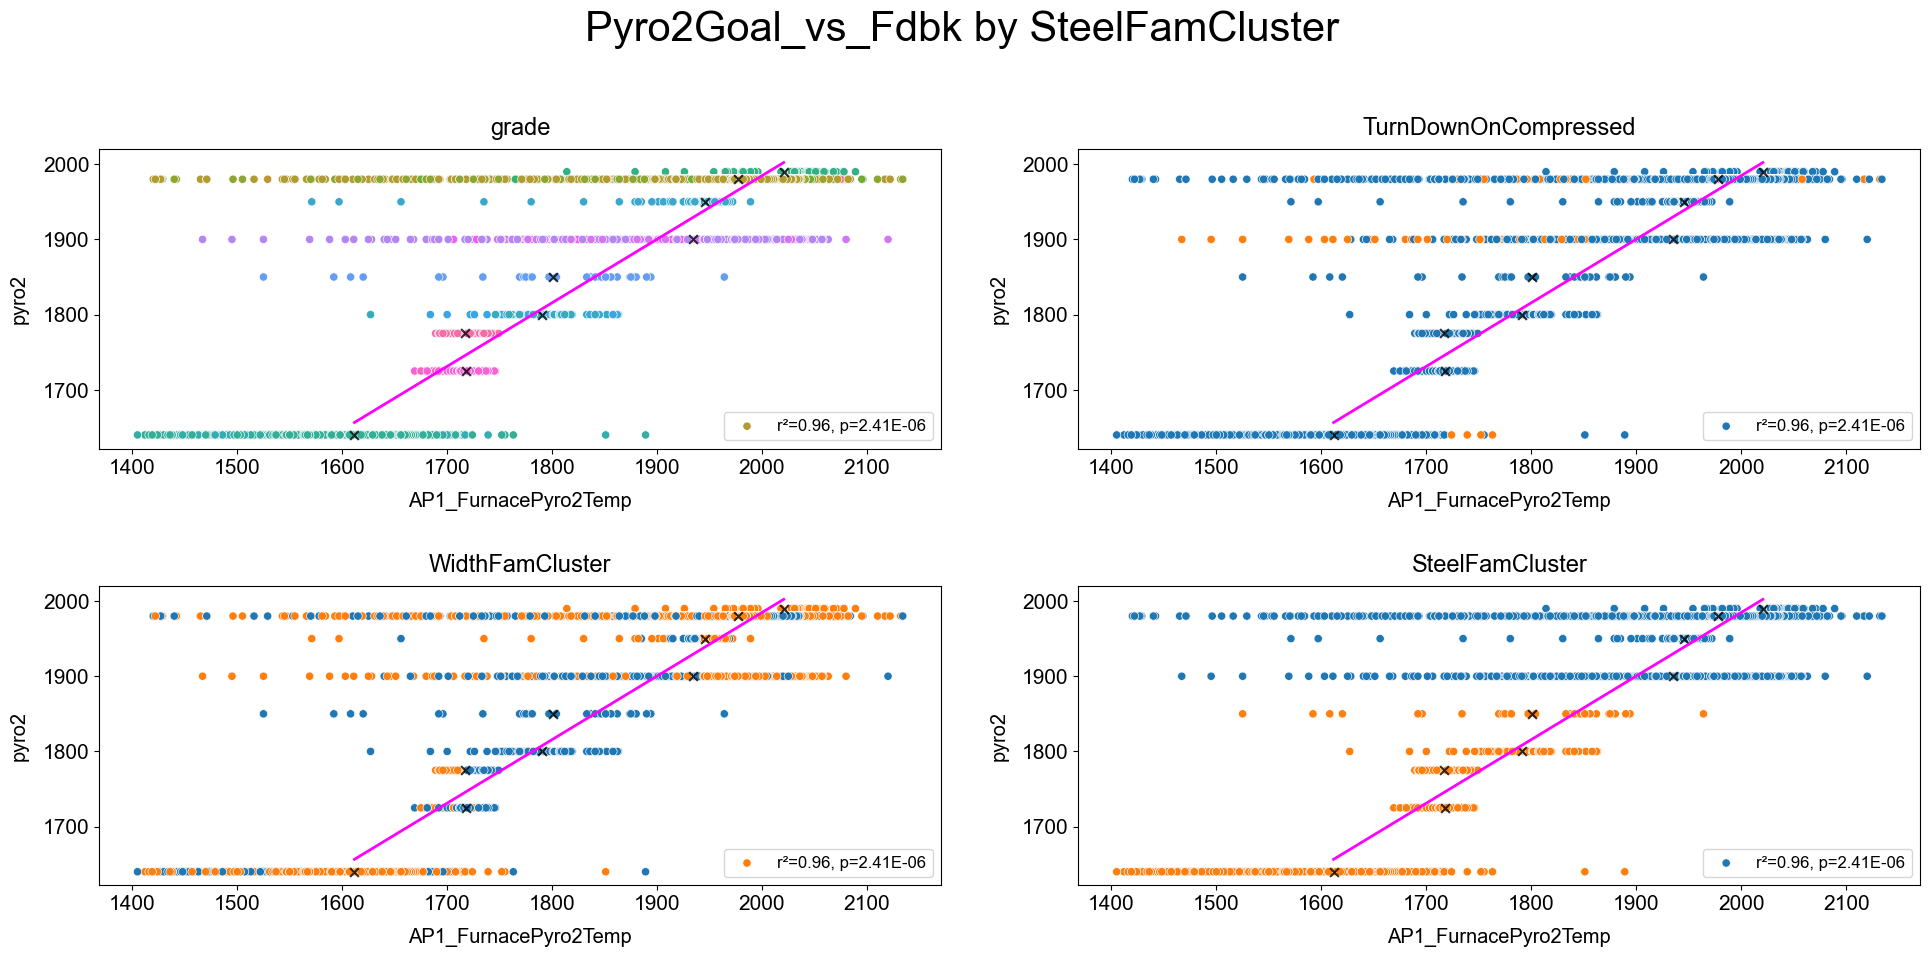

In [58]:
x=["AP1_FurnacePyro2Temp"]
y=["pyro2"]
col=2
row=2

func_plot_reg(ylist=y,ylabel="pyro2",x1list=x,x1label="AP1_FurnacePyro2Temp",nrow=row,ncol=col,title="Pyro2Goal_vs_Fdbk")

dfXY[["pyro2","AP1_FurnacePyro2Temp"]].groupby("pyro2").mean().reset_index()

### Pyro2 vs ZoneTemp, ZoneAir/Gas, Recuperator, RestFurnace, CSdeltaTmin, rampFdbk, soakFdbk

In [ ]:
#pyro2 vs ZoneTemp
sns.set_style("darkgrid")

#var=zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*|.*Setpoint.*",regex=True)].tolist()


var=zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*",regex=True)].tolist()
v=0
tot=["ZoneFdbk","ZoneSetpoints"]
t=0
col=3
row=(len(var)//col+1)+2#+2 for the 2 scatterplots of SP/Fdbk of all zones integrated
hue = ["grade","TurnDownOnCompressed","WidthFamCluster","SteelFamCluster"]

fig,axes = plt.subplots(row,col,figsize=(20,(row*20/5)+2),facecolor='white')
#fig(facecolor='black')
fig.suptitle("Pyro2 fdbk vs ZoneTemp by {}".format(hue[3]),fontsize=30)
for r in range(row):
    for c in range(col):
        if v<len(var):
            data=dfXY[["pyro2","AP1_FurnacePyro2Temp"]+[var[v]]].groupby("pyro2").mean().reset_index()
            sns.scatterplot(dfXY,x=var[v],y="AP1_FurnacePyro2Temp",ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
            sns.kdeplot(data=dfXY,x=var[v],y="AP1_FurnacePyro2Temp",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
            sns.regplot(data=data,x=var[v],y="AP1_FurnacePyro2Temp",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'fuchsia'},order=1,scatter=True,marker='x',scatter_kws={'s':40})#,marker='x',scatter_kws={'s':20}
            #axes[r,c].set_title(label='Pyro2 vs {} by {}'.format(var[v],hue[3]),loc='center',pad=10,fontsize=20)
            axes[r,c].set_title(label='{}'.format(var[v]),loc='center',pad=10,fontsize=17)
            axes[r,c].set_xlabel(xlabel=var[v],labelpad=10,fontsize='x-large')
            axes[r,c].set_ylabel(ylabel="AP1_FurnacePyro2Temp",labelpad=10,fontsize='x-large')
            nan = np.logical_or(data["AP1_FurnacePyro2Temp"].isna().to_numpy(), data[var[v]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(data["AP1_FurnacePyro2Temp"][~nan],data[var[v]][~nan])[0]**2,st.pearsonr(data["AP1_FurnacePyro2Temp"][~nan],data[var[v]][~nan])[1])],fontsize='medium')
            axes[r,c].tick_params(axis='x', labelsize=15)
            axes[r,c].tick_params(axis='y', labelsize=15)
            #axes[r,c].set_facecolor('black')
            v+=1
        elif (v>=len(var)) & (t<len(tot)):#Print SP/Fdbk zones alltoguether
            if t==0:
                data=dfXY[["pyro2","AP1_FurnacePyro2Temp"]+zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*|.*Setpoint.*",regex=True)].tolist()].groupby("pyro2").mean().reset_index()
                for variable in zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*|.*Setpoint.*",regex=True)].tolist():
                    sns.scatterplot(dfXY,x=variable,y="AP1_FurnacePyro2Temp",ax=axes[r,c],hue=hue[3])#,size=2
                
                sns.regplot(data=func_get_dataReg(data),x='X',y="AP1_FurnacePyro2Temp",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40})#,marker='x',scatter_kws={'s':20}   
                nan = np.logical_or(func_get_dataReg(data)["AP1_FurnacePyro2Temp"].isna().to_numpy(), func_get_dataReg(data)['X'].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(func_get_dataReg(data)["AP1_FurnacePyro2Temp"][~nan],func_get_dataReg(data)['X'][~nan])[0]**2,st.pearsonr(func_get_dataReg(data)["AP1_FurnacePyro2Temp"][~nan],func_get_dataReg(data)['X'][~nan])[1])],fontsize='medium')
            elif t==1:
                data=dfXY[["pyro2","AP1_FurnacePyro2Temp"]+zoneTemp_vars_series[zoneTemp_vars_series.str.contains(".*Setpoint.*",regex=True)].tolist()].groupby("pyro2").mean().reset_index()
                for variable in zoneTemp_vars_series[zoneTemp_vars_series.str.contains(".*Setpoint.*",regex=True)].tolist():
                    sns.scatterplot(dfXY,x=variable,y="AP1_FurnacePyro2Temp",ax=axes[r,c],hue=hue[3])#,size=2
                
                sns.regplot(data=func_get_dataReg(data),x='X',y="AP1_FurnacePyro2Temp",ax=axes[r,c],color='black',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40})#,marker='x',scatter_kws={'s':20}   
                nan = np.logical_or(func_get_dataReg(data)["AP1_FurnacePyro2Temp"].isna().to_numpy(), func_get_dataReg(data)['X'].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
                axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(func_get_dataReg(data)["AP1_FurnacePyro2Temp"][~nan],func_get_dataReg(data)['X'][~nan])[0]**2,st.pearsonr(func_get_dataReg(data)["AP1_FurnacePyro2Temp"][~nan],func_get_dataReg(data)['X'][~nan])[1])],fontsize='medium')
                
            axes[r,c].set_title(label='{}'.format(tot[t]),loc='center',pad=10,fontsize=17)
            axes[r,c].set_xlabel(xlabel=tot[t],labelpad=10,fontsize='x-large')
            axes[r,c].set_ylabel(ylabel="AP1_FurnacePyro2Temp",labelpad=10,fontsize='x-large')
            axes[r,c].tick_params(axis='x', labelsize=15)
            axes[r,c].tick_params(axis='y', labelsize=15)
            #axes[r,c].legend([hue[3]],loc='best')#,loc='best',hue[3]
            #axes.legend(zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*|.*Setpoint.*",regex=True)].tolist())#If not hue, show by zone
            t+=1
            
        #remove unused axes
        #print(len(axes[r,c].get_children()))
        if len(axes[r,c].get_children()) <=10:#empty plots have 10 children
            axes[r,c].set_visible(False)
            
fig.tight_layout(pad=3)
#sns.set(rc={'axes.facecolor':'dark', 'figure.facecolor':'dark'})

plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\EDAproject\images\MV\newPyro2_vs_ZoneTemp.png", bbox_inches="tight")

In [ ]:
dfXY["AP1_FurnaceZone3TemperatureSetpoint"][dfXY["AP1_FurnaceZone3TemperatureSetpoint"].between(1000,1400)].shape

sns.scatterplot(data=func_avg_zone(varRatioSP),x="Zone0",y="AP1_FurnacePyro2Temp")#,size=20,hue=hue[3]
zone[0]
func_avg_zone(varRatioSP)[hue[3]]
dfXY[hue[3]]

In [ ]:
#Pyro2 vs zone Ratio: avg Bottom/Top
varRatioSP=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains(".*Ratio.*S.*[Pp].*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*",regex=True))].tolist()
varRatio=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains(".*Ratio.*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*|.*Ratio.*S.*[Pp].*",regex=True))].tolist()
tot=["ZoneSetpoints","ZoneFdbk"]
col=3
row=7

func_plot_reg(ylist=["AP1_FurnacePyro2Temp"],ylabel="pyro2",x1list=varRatioSP,x1label="RatioSP",x2list=varRatio,x2label="RatioFdbk",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="Pyro2_vs_ZoneRatio")

zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Gas.*ControlValve.*",regex=True)]
dfXY.iloc[:1,[1,0]]
pd.concat([pd.DataFrame(dfXY["pyro2"].reset_index(),columns=["pyro2"]),func_avg_zone(varRatioSP).iloc[:,[9,0,1,2,3,4,5,6,7,8]]],axis=1).groupby("pyro2").mean().reset_index()
#func_avg_zone(varRatioSP).iloc[:,[9,0,1,2,3,4,5,6,7,8]]

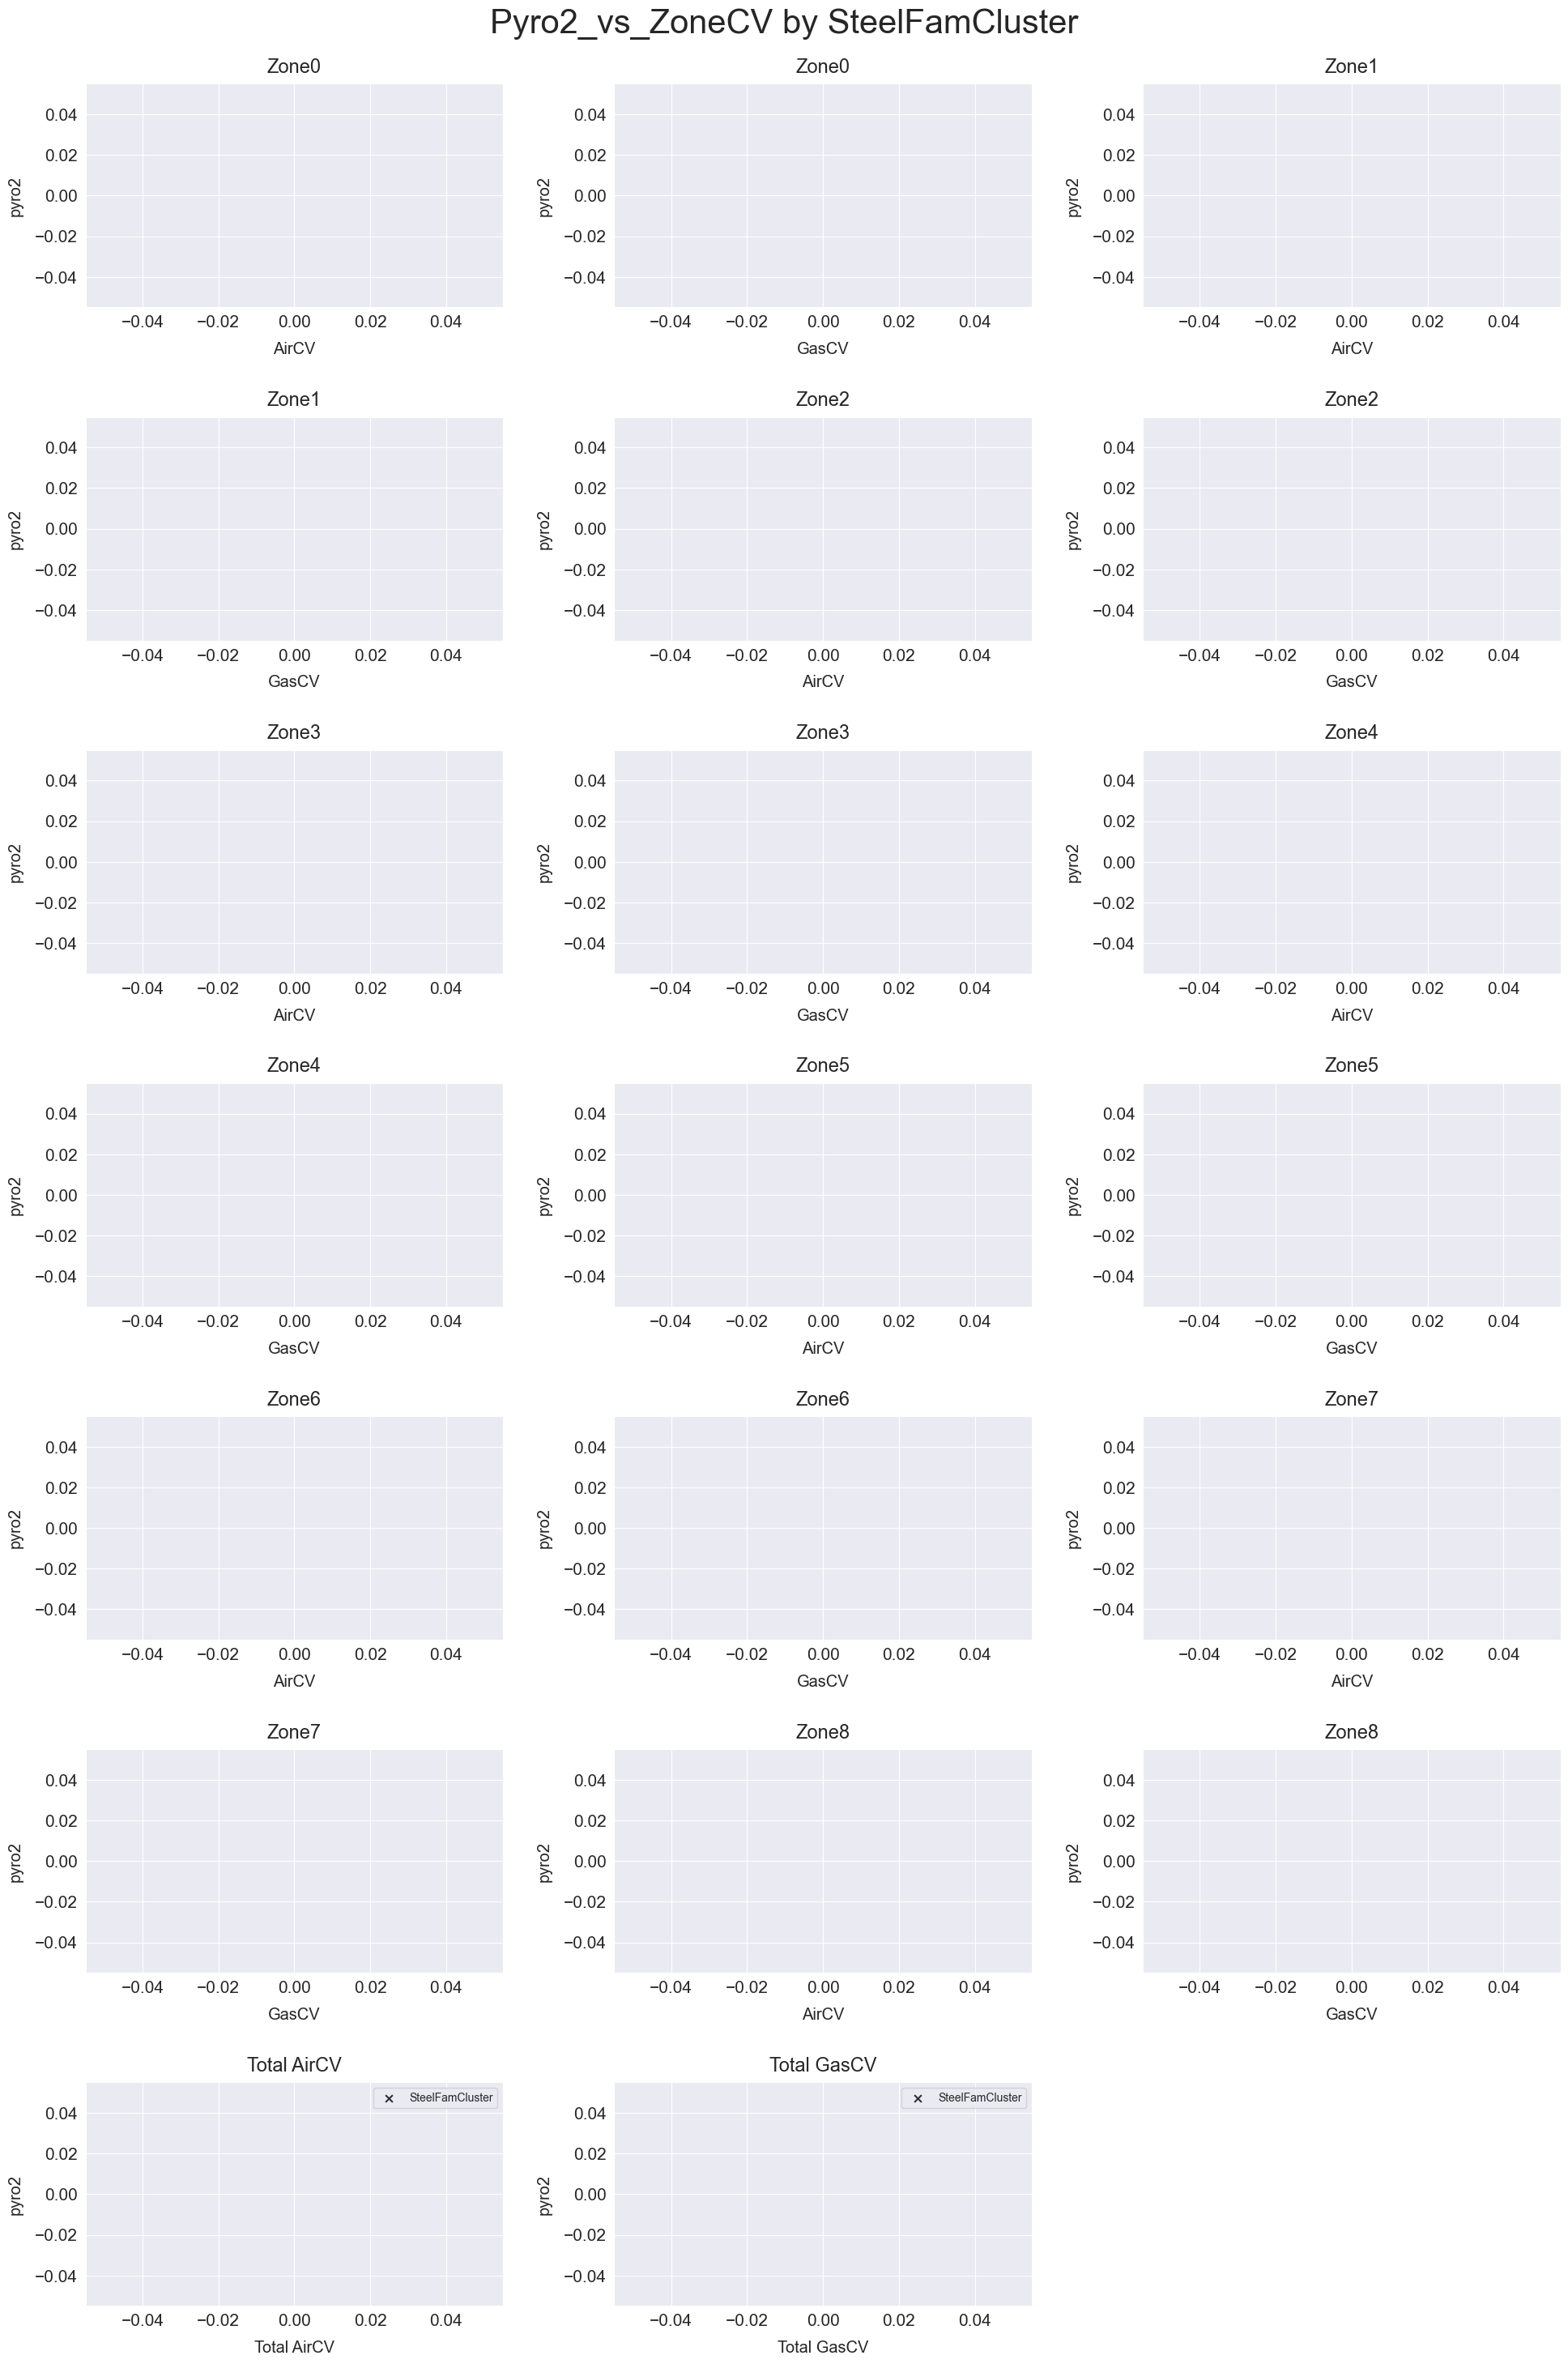

In [106]:
#Pyro2 vs zone CV: avg Bottom/Top
varCVair=zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Air.*ControlValve.*",regex=True)].tolist()
varCVgas=zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Gas.*ControlValve.*",regex=True)].tolist()
tot=["Total AirCV","Total GasCV"]
col=3
row=7

func_plot_reg(ylist=["AP1_FurnacePyro2Temp"],ylabel="pyro2",x1list=varCVair,x1label="AirCV",x2list=varCVgas,x2label="GasCV",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="Pyro2_vs_ZoneCV")

#func_avg_zone(varCVair).loc[(func_avg_zone(varCVair)["AP1_FurnacePyro2Temp"]<0).values,["Zone2","AP1_FurnacePyro2Temp"]]
##(func_avg_zone(varCVair)["AP1_FurnacePyro2Temp"]<0).values.astype(bool)
##func_avg_zone(varCVair).loc[[(func_avg_zone(varCVair)["AP1_FurnacePyro2Temp"]<0).],["Zone2","AP1_FurnacePyro2Temp"]]
#pd.concat([pd.DataFrame(dfXY["pyro2"].reset_index(),columns=["pyro2"]),func_avg_zone(varCVair).iloc[:,[9,0,1,2,3,4,5,6,7,8]]],axis=1).groupby("pyro2").mean().reset_index()
#func_avg_zone(varCVair)
#dfXY[["pyro2","AP1_FurnacePyro2Temp","AP1_FurnaceZone2BottomAirFlowControlValveOutput","AP1_FurnaceZone2TopAirFlowControlValveOutput"]].groupby("pyro2").mean().reset_index()
#dfXY[["AP1_FurnaceZone2BottomAirFlowControlValveOutput","AP1_FurnaceZone2TopAirFlowControlValveOutput"]].mean(axis=1)==(dfXY["AP1_FurnaceZone2BottomAirFlowControlValveOutput"]+dfXY["AP1_FurnaceZone2TopAirFlowControlValveOutput"])/2
#(dfXY["AP1_FurnaceZone2BottomAirFlowControlValveOutput"]+dfXY["AP1_FurnaceZone2TopAirFlowControlValveOutput"])/2
##func_avg_zone(varCVair)
#varCVair[0+1]

df=pd.DataFrame(np.zeros((dfXY.shape[0],len(varCVair)//2)))
df.iloc[:,:]=np.nan
i=0
j=0
while i < len(varCVair)//2:#j<9
    df.iloc[:,i]=dfXY.loc[:,[varCVair[j],varCVair[j+1]]].mean(axis=1)
    #print("{} vs {}".format(varCVair[j],varCVair[j+1]))
    j+=2
    i+=1
(~(df.iloc[:,1]==((dfXY["AP1_FurnaceZone1BottomAirFlowControlValveOutput"]+dfXY["AP1_FurnaceZone1TopAirFlowControlValveOutput"])/2).reset_index(drop=True))).sum()

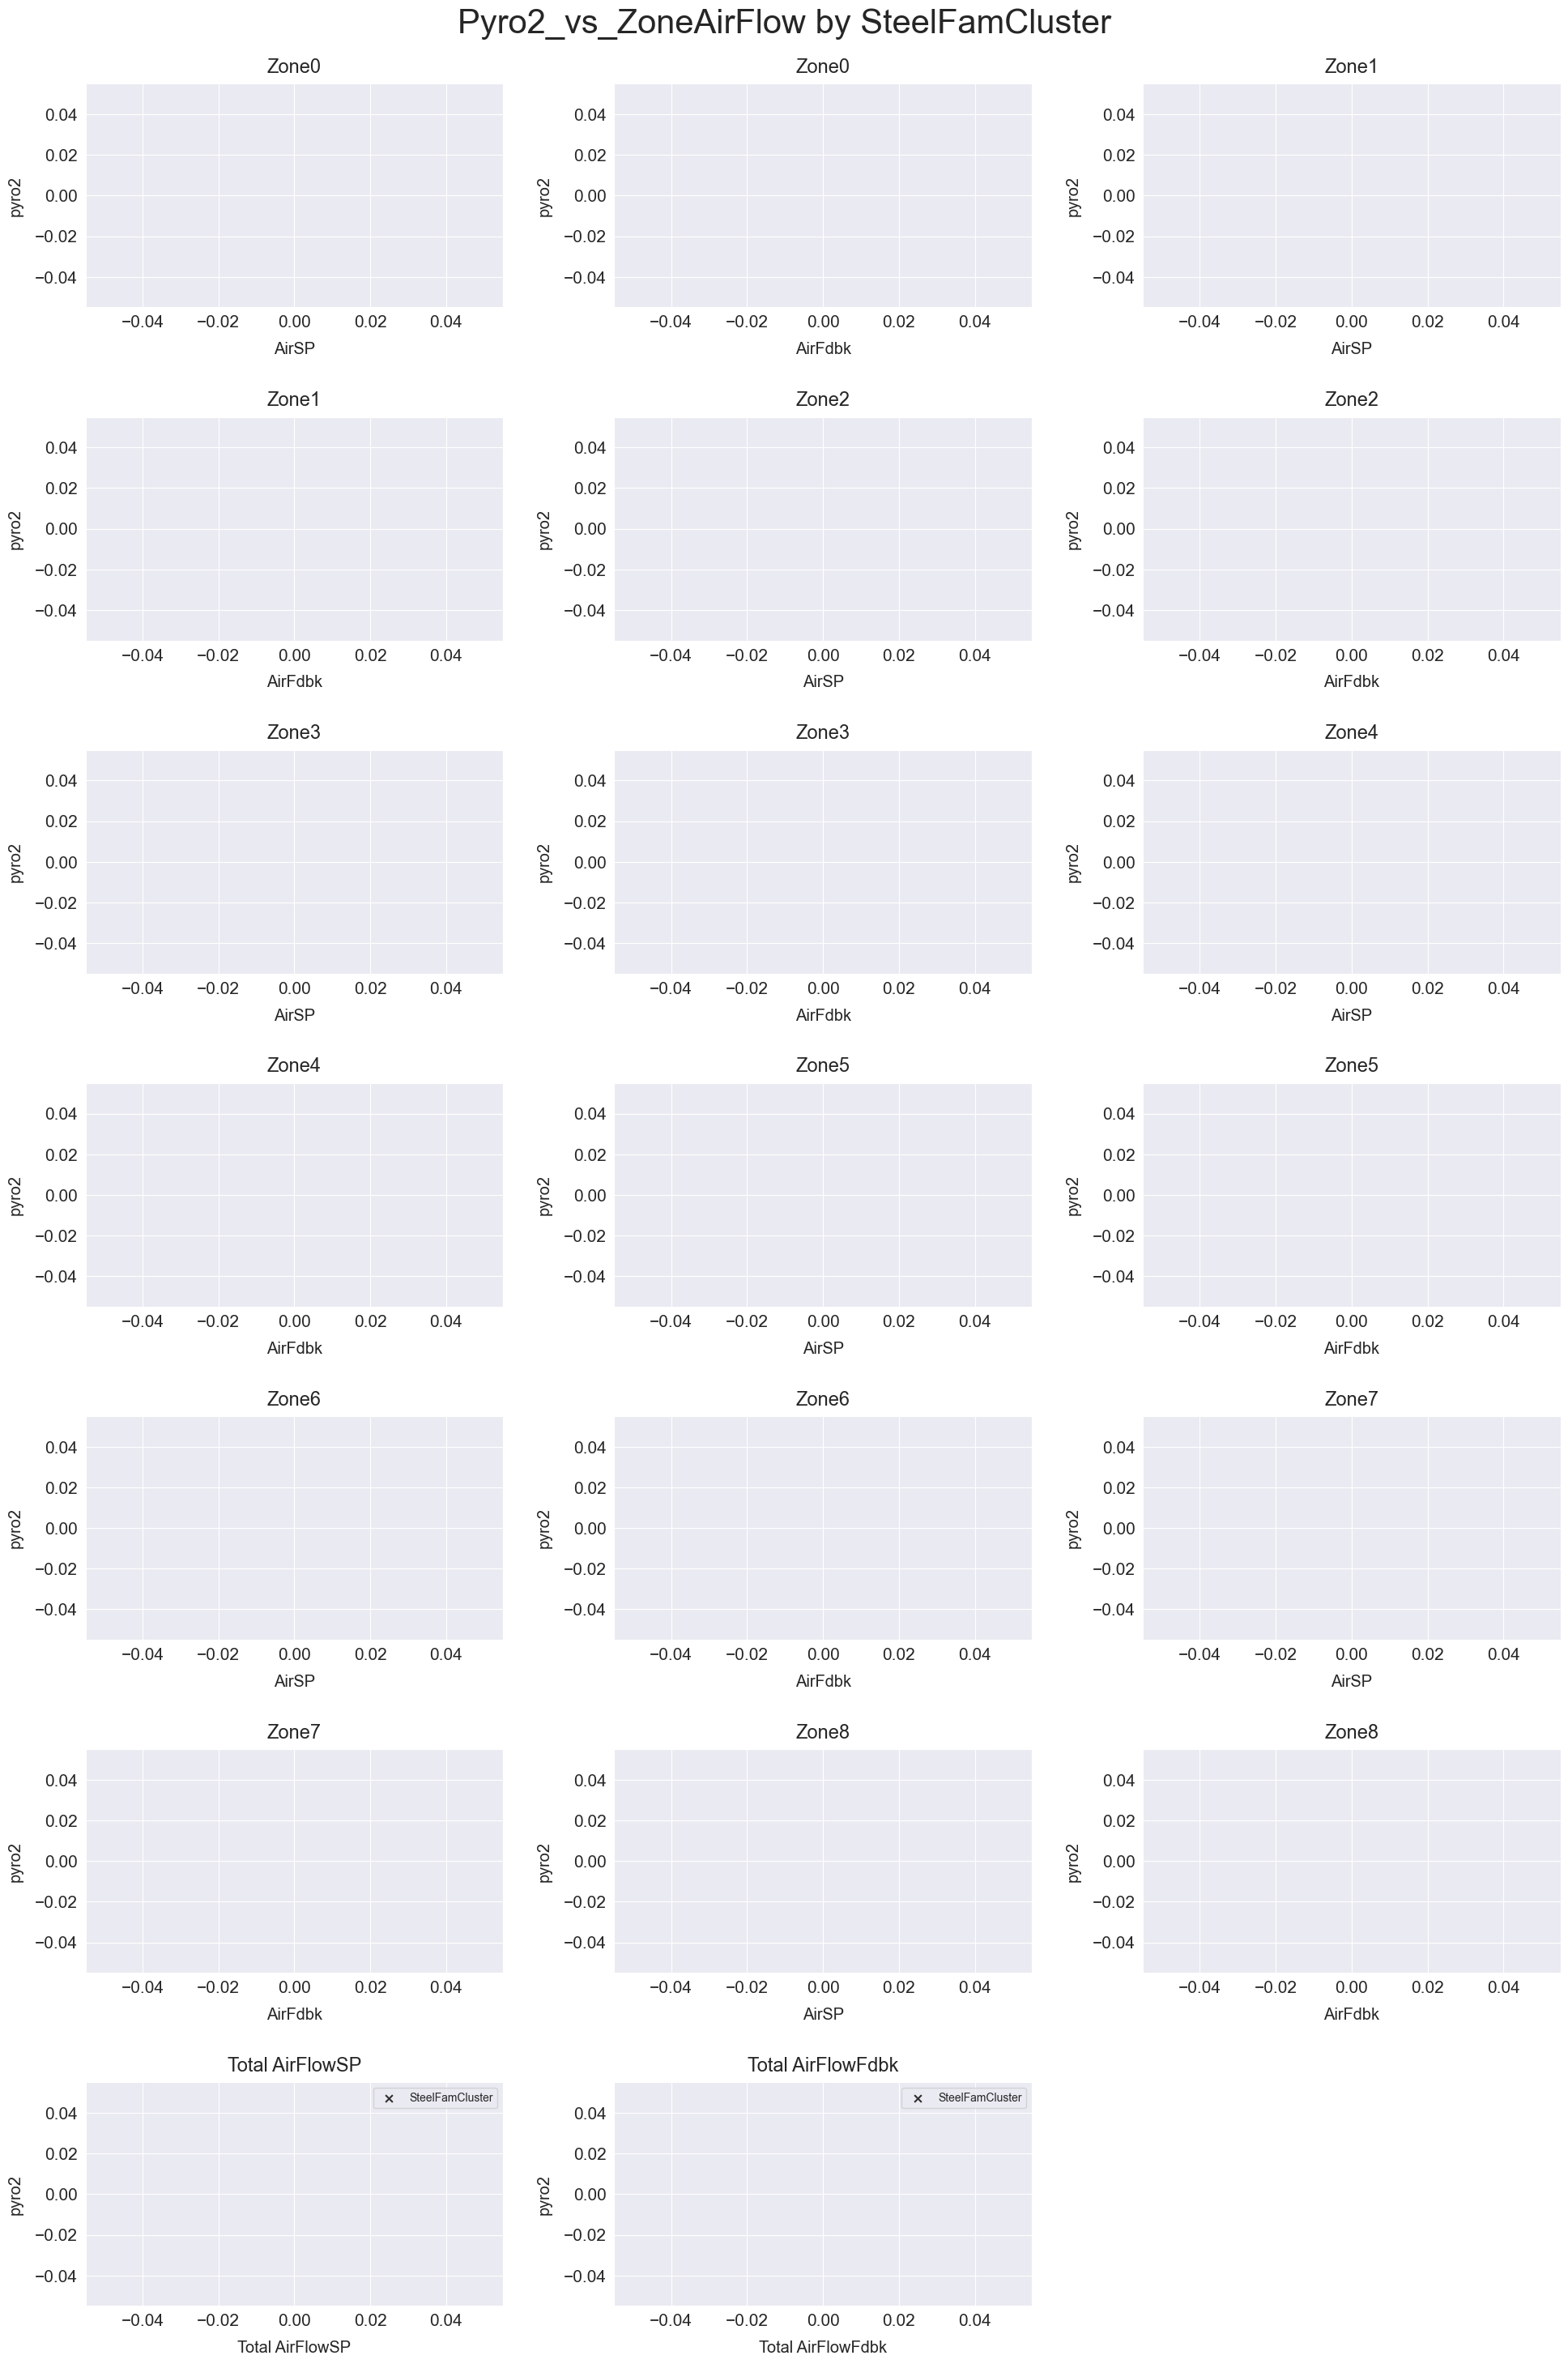

In [107]:
#Pyro2 vs zone AirFlow: avg Bottom/Top
varAirSP=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("AirFlow.*Set[Pp]oint.*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*",regex=True))].tolist()
varAir=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("AirFlow",regex=False), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*|.*Set[Pp]oint.*",regex=True))].tolist()
tot=["Total AirFlowSP","Total AirFlowFdbk"]
col=3
row=7

func_plot_reg(ylist=["AP1_FurnacePyro2Temp"],ylabel="pyro2",x1list=varAirSP,x1label="AirSP",x2list=varAir,x2label="AirFdbk",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="Pyro2_vs_ZoneAirFlow")

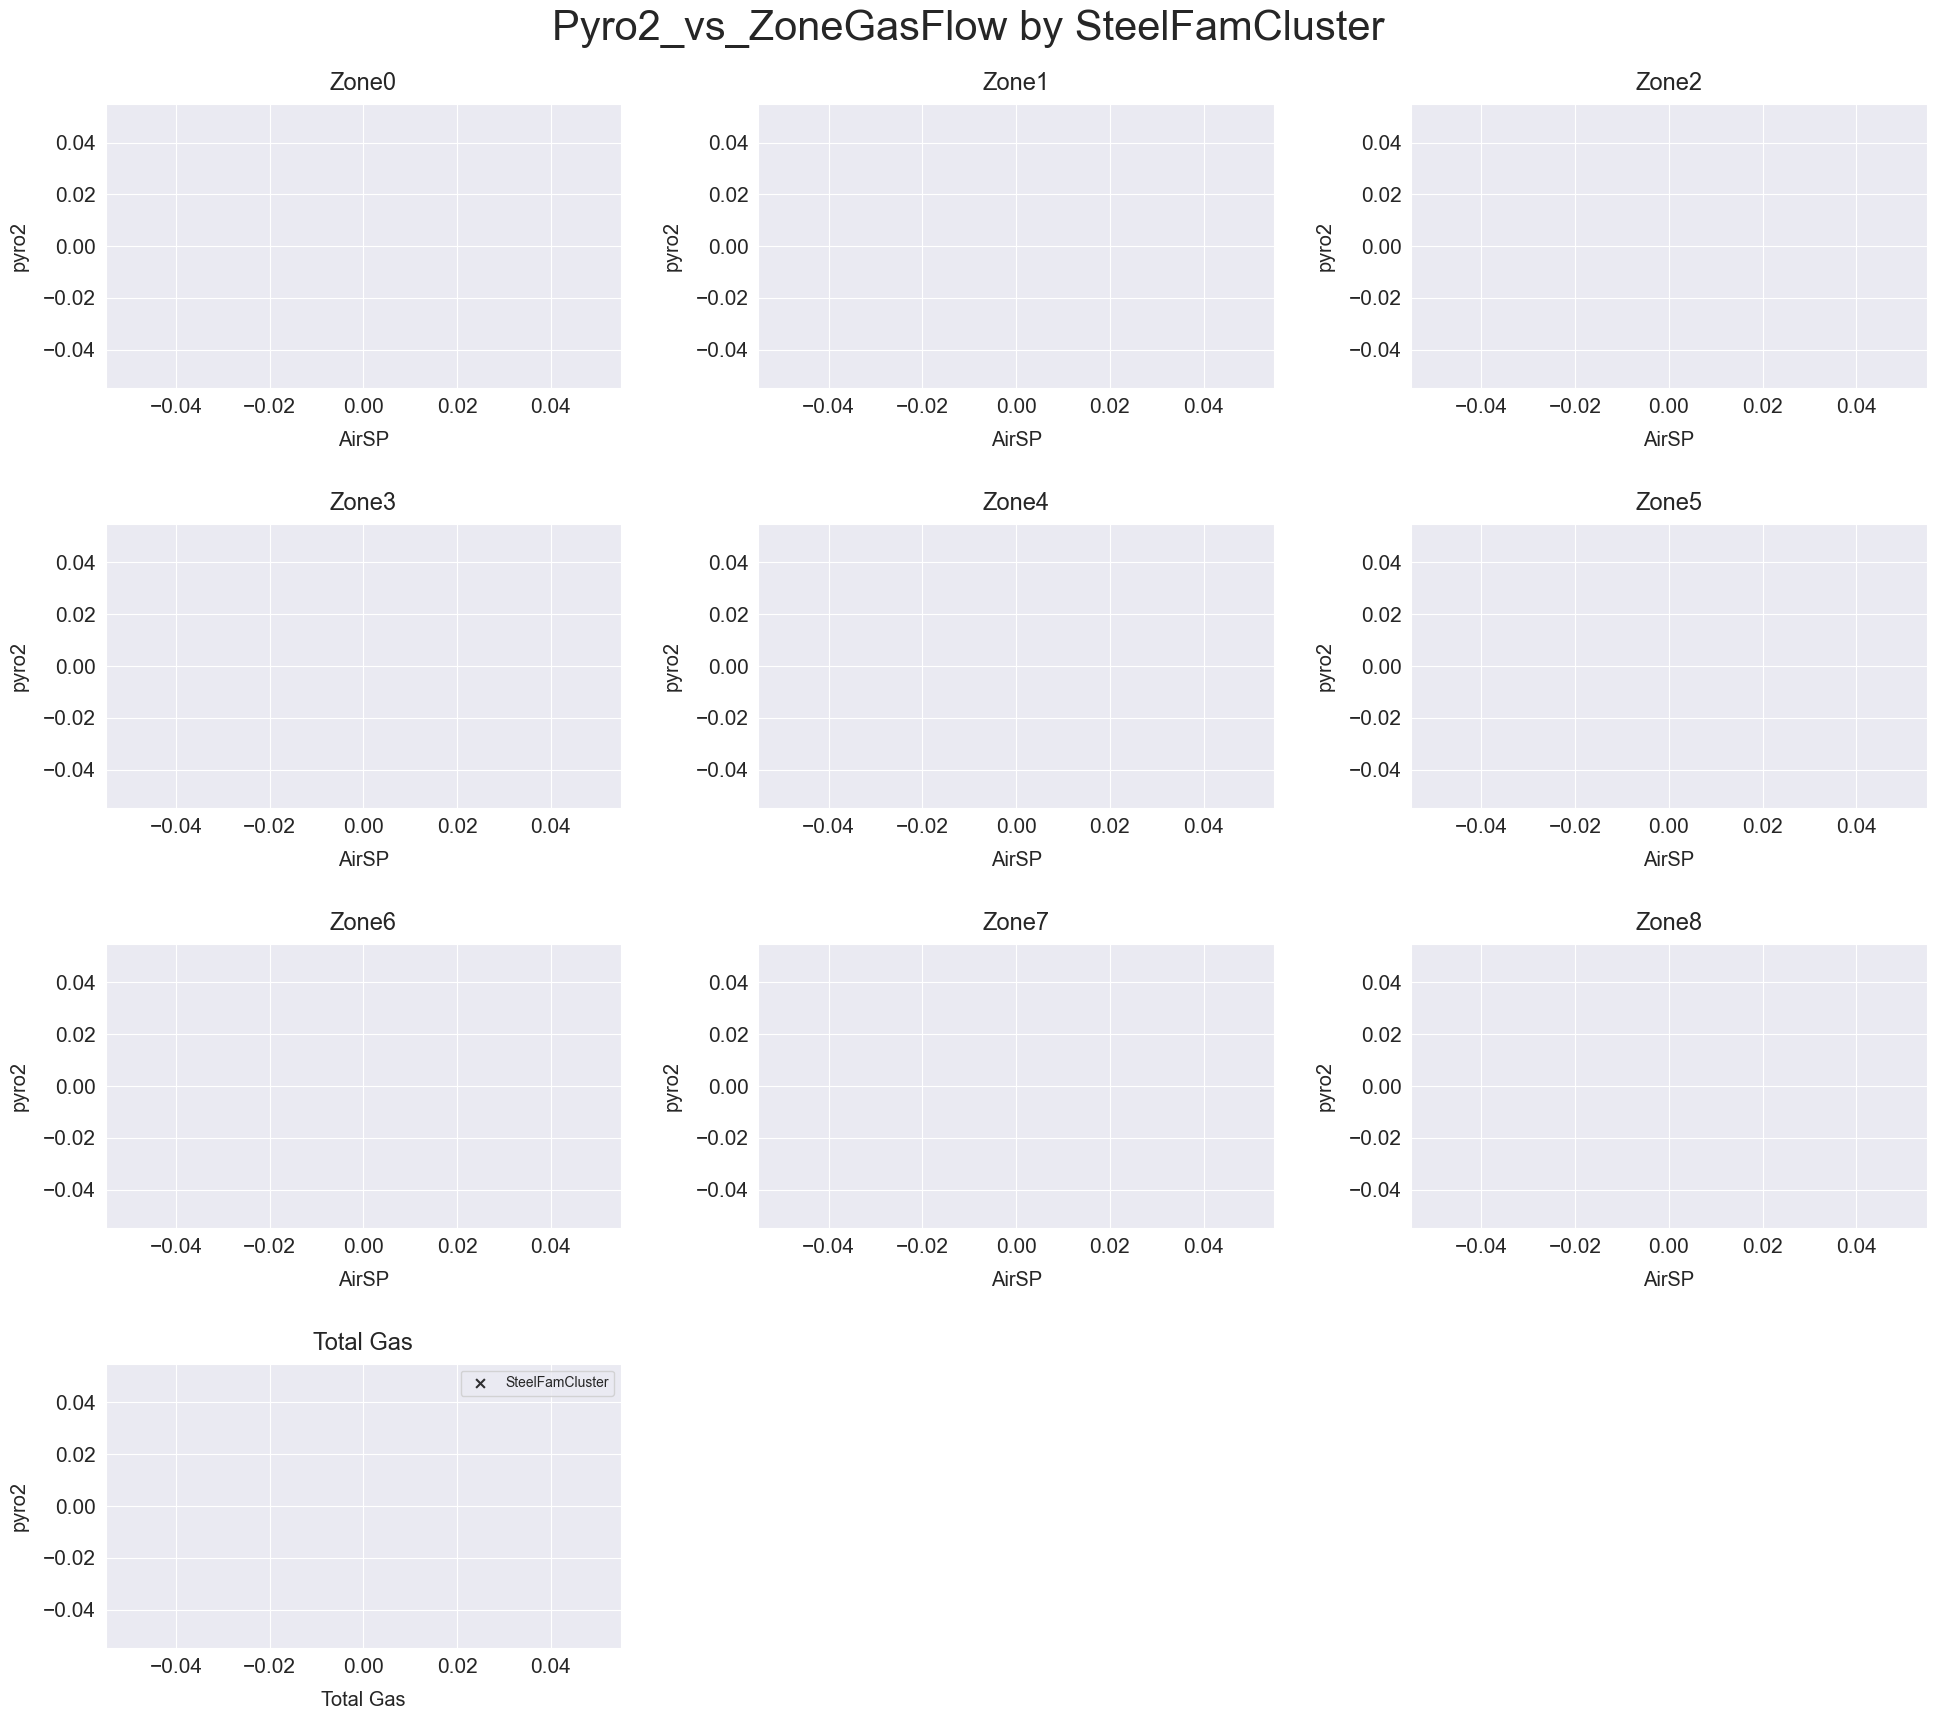

In [108]:
#Pyro2 vs zone GasFlow: avg Bottom/Top
varGas=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("GasFlow",regex=False), ~zoneAirGas_vars_series.str.contains("ControlValve",regex=False))].tolist()
tot=["Total Gas"]
col=3
row=7

func_plot_reg(ylist=["AP1_FurnacePyro2Temp"],ylabel="pyro2",x1list=varGas,x1label="AirSP",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="Pyro2_vs_ZoneGasFlow")

rest_vars_series
dfXY[["pyro2","AP1_FurnacePyro2Temp","AP1_FurnacePressureCV"]].groupby("pyro2").mean()
#dfXY["AP1_FurnacePressureCV"].min()
dfXY[["pyro2","AP1_FurnacePyro2Temp"]+var].groupby("pyro2").mean().reset_index()
rest_vars_series

C:\Users\carlo\AppData\Local\Temp\ipykernel_13472\2933551440.py:98: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=scatter,x=zone[z],y="Y",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
C:\Users\carlo\AppData\Local\Temp\ipykernel_13472\2933551440.py:98: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=scatter,x=zone[z],y="Y",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
C:\Users\carlo\AppData\Local\Temp\ipykernel_13472\2933551440.py:98: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=scatter,x=zone[z],y="Y",levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=

IndexError: cannot do a non-empty take from an empty axes.

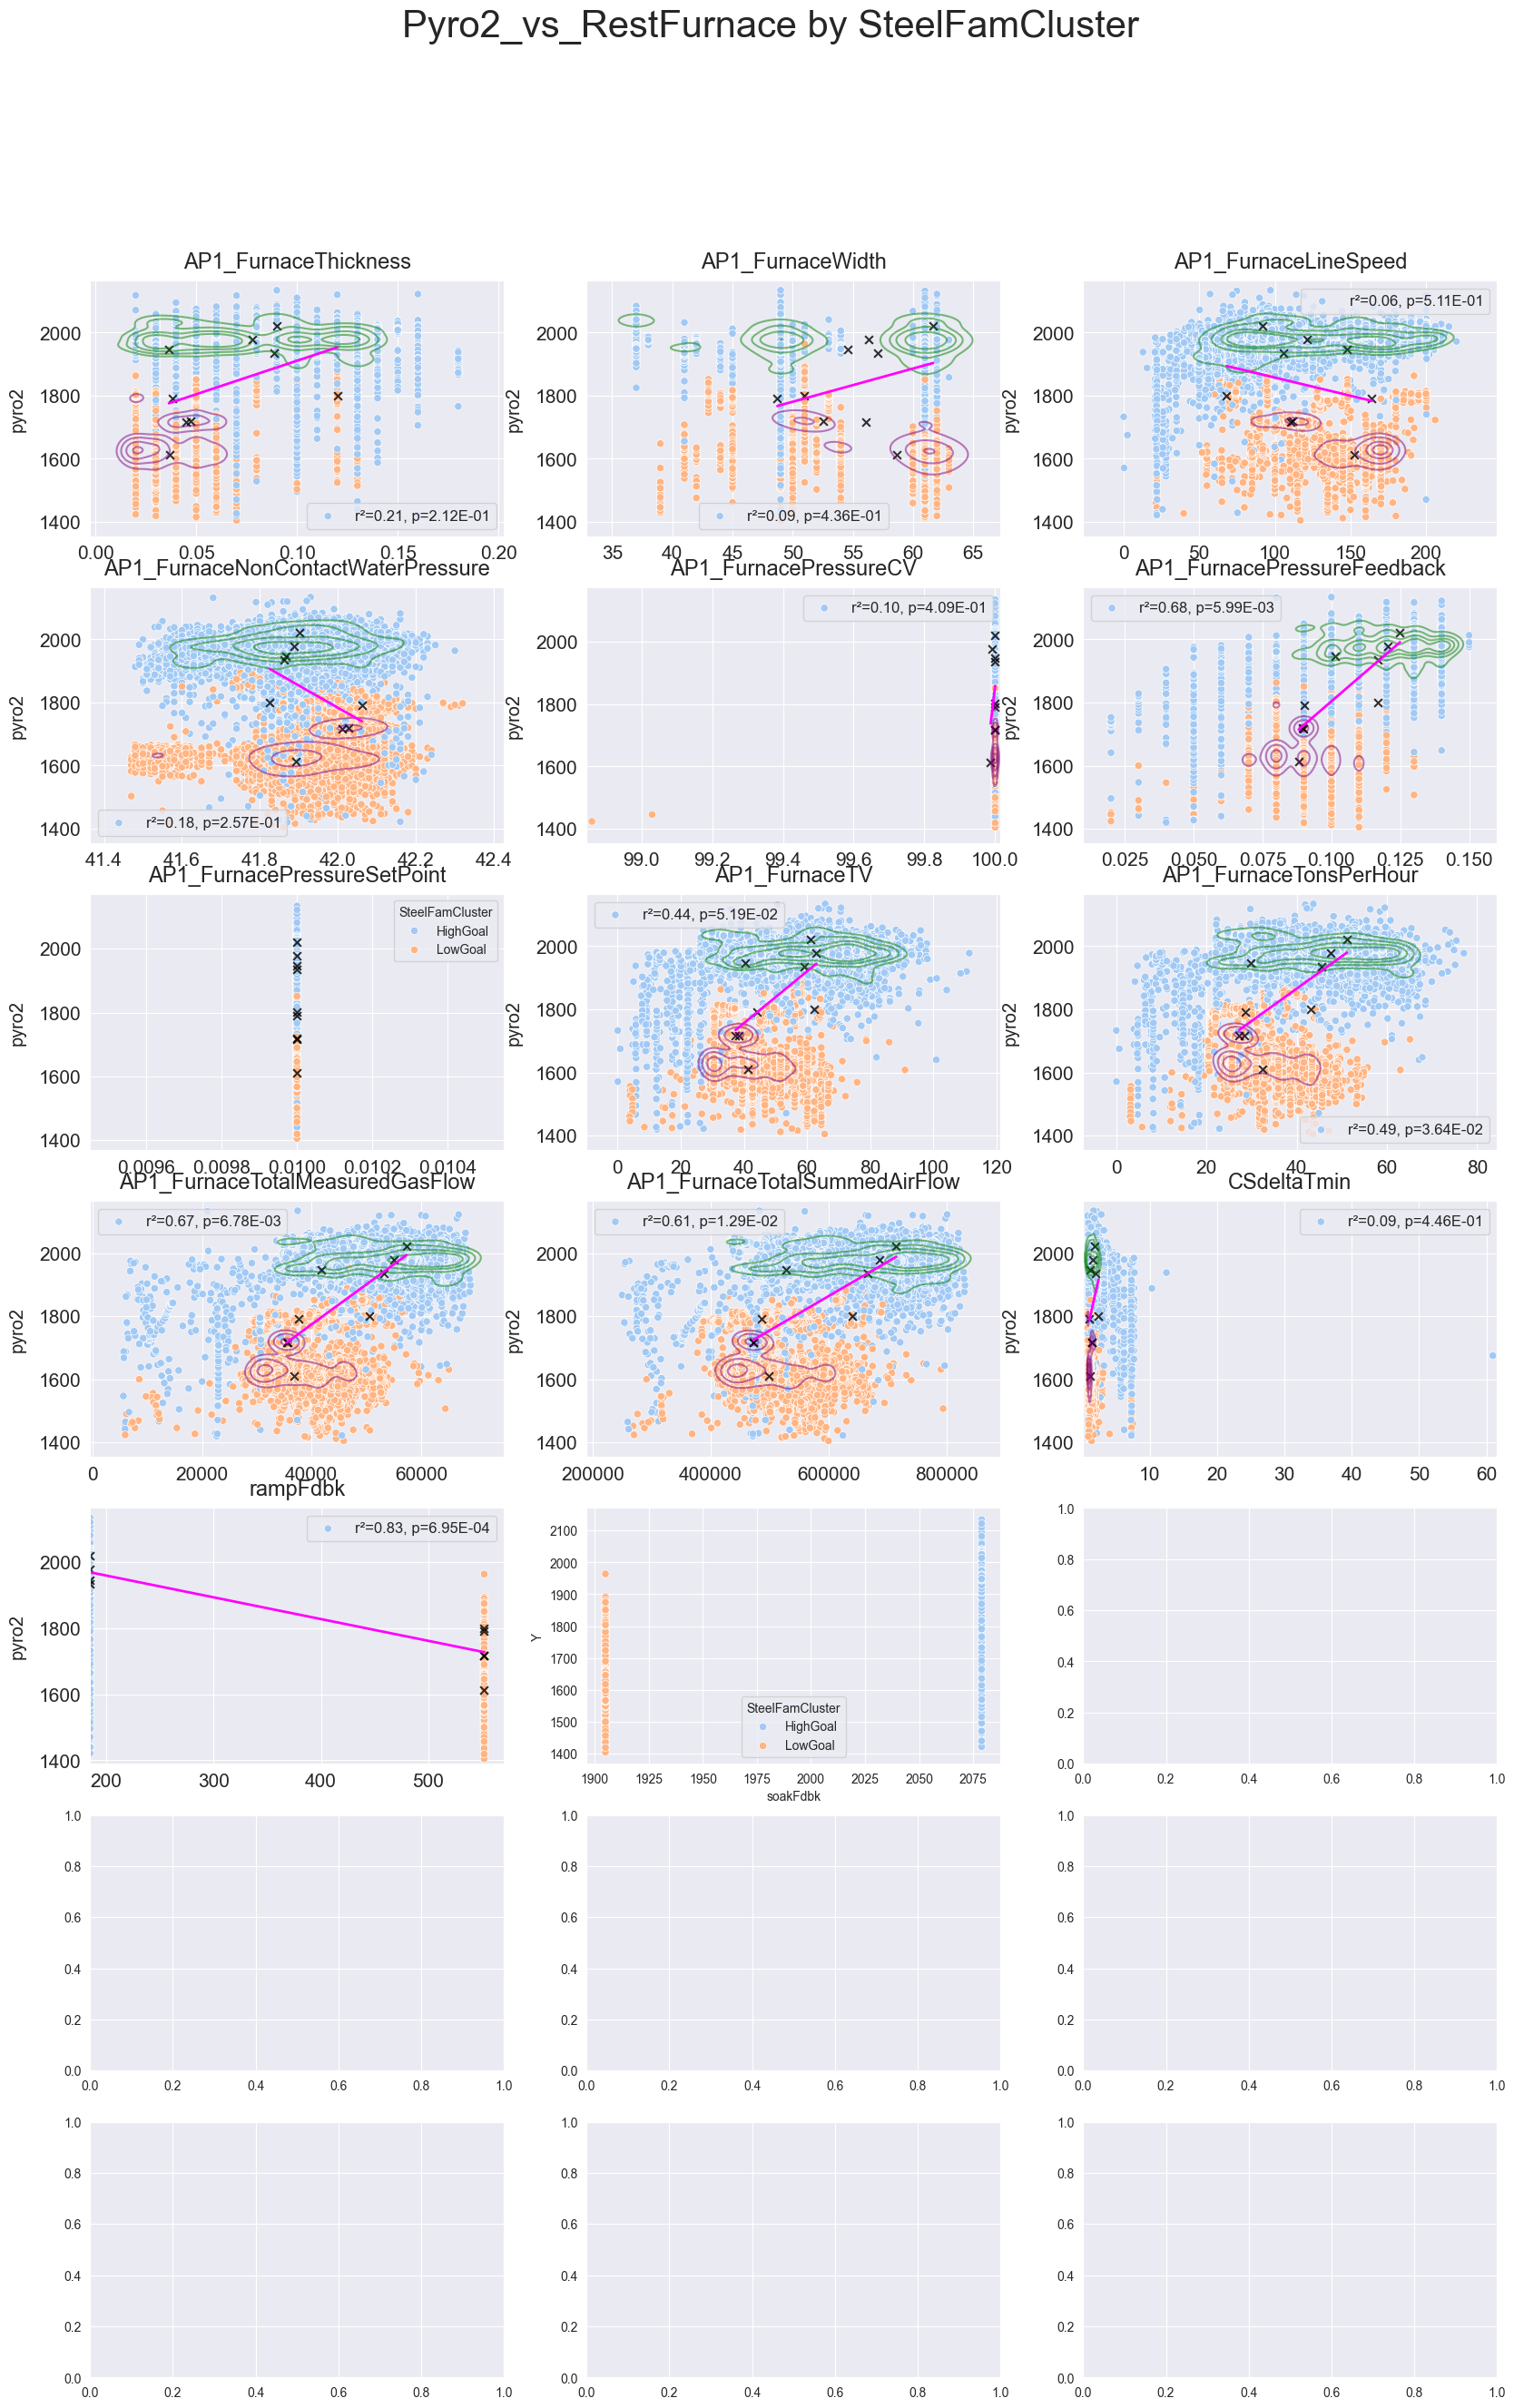

In [109]:
#pyro2 vs restVars
var=rest_vars_series.tolist()+["CSdeltaTmin","rampFdbk","soakFdbk"]
y=["AP1_FurnacePyro2Temp"]
col=3
row=7

func_plot_reg(ylist=y,ylabel="pyro2",x1list=var,nrow=row,ncol=col,title="Pyro2_vs_RestFurnace",kde=True)

proceso_vars_series

In [ ]:
#pyro2 vs proceso vars
var=proceso_vars_series.tolist()
y=["AP1_FurnacePyro2Temp"]
col=3
row=7

func_plot_reg(ylist=y,ylabel="pyro2",x1list=var,nrow=row,ncol=col,title="Pyro2_vs_Proceso")

recuperator_vars_series
#dfXY[["pyro2","AP1_FurnacePyro2Temp"]+var].groupby("pyro2").mean().reset_index()

In [ ]:
#pyro2 vs recuperator vars
var=recuperator_vars_series.tolist()
y=["AP1_FurnacePyro2Temp"]
col=3
row=7

func_plot_reg(ylist=y,ylabel="pyro2",x1list=var,nrow=row,ncol=col,title="Pyro2_vs_Recuperator",kde=True)

### pyro2 vs pyro1

In [ ]:
x=["AP1_FurnacePyro1Temp"]
y=["AP1_FurnacePyro2Temp"]
col=2
row=2

func_plot_reg(ylist=y,ylabel="pyro2",x1list=x,x1label="pyro1",nrow=row,ncol=col,title="Pyro2_vs_Pyro1")

### ZoneTempSP vs ZoneTempFdbk

In [ ]:
#ZoneTempSP vs zone ZoneTempFdbk: avg Bottom/Top
TempSP=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#10
vSP=0
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
v=0
zone=["Zone0","Zone1","Zone2","Zone3","Zone4","Zone5","Zone6","Zone7","Zone8"]
z=0
col=3
row=7
#row=(len(zone)//col+1)+2#+2 for the 2 scatterplots of SP/Fdbk of all zones integrated
hue = ["grade","TurnDownOnCompressed","WidthFamCluster","SteelFamCluster"]
tot=True
fig,axes = plt.subplots(row,col,figsize=(20,(row*20/5)+2),facecolor='white')
fig.suptitle("TempSP vs TempFdbk by {}".format(hue[3]),fontsize=30)
for r in range(row):
    for c in range(col):
        if z==0:
            data=dfXY[["pyro2"]+TempSP+Temp].groupby("pyro2").mean().reset_index()
            sns.scatterplot(data=dfXY,x=Temp[v],y=TempSP[vSP],ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
            sns.kdeplot(data=dfXY,x=Temp[v],y=TempSP[vSP],levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
            sns.regplot(data=data,x=Temp[v],y=TempSP[vSP],ax=axes[r,c],color='pink',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}
            #axes[r,c].set_title(label='Pyro2 vs {} by {}'.format(var[v],hue[3]),loc='center',pad=10,fontsize=20)
            axes[r,c].set_title(label='Temp SP vs Fdbk in {}'.format(zone[z]),loc='center',pad=10,fontsize=17)
            axes[r,c].set_xlabel(xlabel=Temp[v],labelpad=10,fontsize='x-large')
            axes[r,c].set_ylabel(ylabel=TempSP[vSP],labelpad=10,fontsize='x-large')
            nan = np.logical_or(data[TempSP[vSP]].isna().to_numpy(), data[Temp[v]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(data[TempSP[vSP]][~nan],data[Temp[v]][~nan])[0]**2,st.pearsonr(data[TempSP[vSP]][~nan],data[Temp[v]][~nan])[1])],fontsize='large') 
            axes[r,c].tick_params(axis='x', labelsize=15)
            axes[r,c].tick_params(axis='y', labelsize=15)
            vSP+=1
            if vSP==2:
                v+=1
                z+=1
        elif z<len(zone):
            data=dfXY[["pyro2"]+TempSP+Temp].groupby("pyro2").mean().reset_index()
            sns.scatterplot(data=dfXY,x=Temp[v],y=TempSP[vSP],ax=axes[r,c],hue=hue[3],palette="pastel")#,size=20
            sns.kdeplot(data=dfXY,x=Temp[v],y=TempSP[vSP],levels=5,thresh=0.2,alpha=0.5,hue=hue[3],ax=axes[r,c],palette=["green","purple"])#,levels=5,thresh=0.2,palette="dark:#5A9_r
            sns.regplot(data=data,x=Temp[v],y=TempSP[vSP],ax=axes[r,c],color='pink',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}
            #axes[r,c].set_title(label='Pyro2 vs {} by {}'.format(var[v],hue[3]),loc='center',pad=10,fontsize=20)
            axes[r,c].set_title(label='Temp SP vs Fdbk in {}'.format(zone[z]),loc='center',pad=10,fontsize=17)
            axes[r,c].set_xlabel(xlabel=Temp[v],labelpad=10,fontsize='x-large')
            axes[r,c].set_ylabel(ylabel=TempSP[vSP],labelpad=10,fontsize='x-large')
            nan = np.logical_or(data[TempSP[vSP]].isna().to_numpy(), data[Temp[v]].isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(data[TempSP[vSP]][~nan],data[Temp[v]][~nan])[0]**2,st.pearsonr(data[TempSP[vSP]][~nan],data[Temp[v]][~nan])[1])],fontsize='large') 
            axes[r,c].tick_params(axis='x', labelsize=15)
            axes[r,c].tick_params(axis='y', labelsize=15)
            vSP+=1
            v+=1
            z+=1 
            
        elif (z>=len(zone)) & tot:#Print SP/Fdbk zones alltoguether
            v=0
            vSP=0
            for variable in zone:
                if variable == "Zone0":
                    while vSP<2:
                        sns.scatterplot(data=dfXY,x=Temp[v],y=TempSP[vSP],ax=axes[r,c],hue=hue[3])#,size=2
                        #print("{} vs {}".format(TempSP[vSP],Temp[v]))
                        vSP+=1
                    if vSP==2:
                        v+=1
                else:
                    sns.scatterplot(data=dfXY,x=Temp[v],y=TempSP[vSP],ax=axes[r,c],hue=hue[3])#,size=2
                    #print("{} vs {}".format(TempSP[vSP],Temp[v]))
                    v+=1
                    vSP+=1
                    
            Y=func_get_dataReg(dfXY[["pyro2","AP1_FurnacePyro2Temp"]+TempSP].groupby("pyro2").mean().reset_index()).X
            X=func_get_dataReg(dfXY[["pyro2","AP1_FurnacePyro2Temp"]+Temp].groupby("pyro2").mean().reset_index()).X
            sns.regplot(x=X,y=Y,ax=axes[r,c],color='black',line_kws={'lw':2,'color':'red'},order=1,scatter=True,marker='x',scatter_kws={'s':40},x_ci=None,ci=None)#,marker='x',scatter_kws={'s':20}   
            nan = np.logical_or(X.isna().to_numpy(), Y.isna().to_numpy())#OR of na values in X and Y, as pearsonr doesnt like nans
            axes[r,c].legend(['r\u00b2={:.2f}, p={:.2E}'.format(st.pearsonr(Y[~nan],X[~nan])[0]**2,st.pearsonr(Y[~nan],X[~nan])[1])],fontsize='medium')
            axes[r,c].set_title(label='Total Zones Temp',loc='center',pad=10,fontsize=17)
            axes[r,c].set_xlabel(xlabel="Temp Fdbk",labelpad=10,fontsize='x-large')
            axes[r,c].set_ylabel(ylabel="Temp SP",labelpad=10,fontsize='x-large')
            axes[r,c].tick_params(axis='x', labelsize=15)
            axes[r,c].tick_params(axis='y', labelsize=15)
            #axes[r,c].legend([hue[3]],loc='best')#,loc='best',hue[3]
            #axes.legend(zoneTemp_vars_series[~zoneTemp_vars_series.str.contains(".*CV.*|.*Setpoint.*",regex=True)].tolist())#If not hue, show by zone
            tot=False
            
        #remove unused axes
        #print(len(axes[r,c].get_children()))
        if len(axes[r,c].get_children()) <=10:#empty plots have 10 children
            axes[r,c].set_visible(False)
            
fig.tight_layout(pad=3)
sns.set_style("darkgrid")

plt.savefig(r"C:\Users\carlo\Desktop\Projects\AP1\AP1_repo\EDAproject\images\MV\newZoneTempSP_vs_ZoneTempFdbk.png", bbox_inches="tight")

zoneTemp_vars_series
zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))]
func_get_dataReg(dfXY[["pyro2","AP1_FurnacePyro2Temp"]+TempSP].groupby("pyro2").mean().reset_index())

### ZoneTempFdbk vs ZoneAirGasFlows,Recuperator,RestFurnaceVars,Proceso

In [ ]:
#ZoneTempFdbk vs zone AirFlow: avg Bottom/Top
varAirSP=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("AirFlow.*Set[Pp]oint.*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*",regex=True))].tolist()
varAir=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("AirFlow",regex=False), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*|.*Set[Pp]oint.*",regex=True))].tolist()
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
tot=["Total AirFlowSP","Total AirFlowFdbk"]
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=varAirSP,x1label="AirSP",x2list=varAir,x2label="AirFdbk",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="ZoneTempFdbk_vs_AirFlow")

func_avg_zone(varAirSP)
pd.concat([pd.DataFrame(dfXY[["pyro2"]+Temp].reset_index(drop=True)),func_avg_zone(varAir).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1).groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))]#.iloc[:,[0,1]+list(range(11,20))]
func_get_dataReg(pd.concat([pd.DataFrame(dfXY[["pyro2"]+Temp].reset_index(drop=True)),func_avg_zone(varAirSP).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1).groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,:11]).X
func_get_dataReg(pd.concat([pd.DataFrame(dfXY[["pyro2"]+Temp].reset_index(drop=True)),func_avg_zone(varAirSP).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1).groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,[0,1]+list(range(11,20))]).X
#pd.concat([pd.DataFrame(dfXY[Temp+["pyro2"]].reset_index(drop=True)),func_avg_zone(varAirSP).iloc[:,:]],axis=1)

In [ ]:
#ZoneTempFdbk vs zone GasFlow: avg Bottom/Top
varGas=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains("GasFlow",regex=False), ~zoneAirGas_vars_series.str.contains("ControlValve",regex=False))].tolist()
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
tot=["Total GasFlowFdbk"]
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=varGas,x1label="GasFlow",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="ZoneTempFdbk_vs_GasFlow")

In [ ]:
#ZoneTempFdbk vs zone CV: avg Bottom/Top
varCVair=zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Air.*ControlValve.*",regex=True)].tolist()
varCVgas=zoneAirGas_vars_series[zoneAirGas_vars_series.str.contains(".*Gas.*ControlValve.*",regex=True)].tolist()
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
tot=["Total AirCV","Total GasCV"]
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=varCVair,x1label="CVair",x2list=varCVgas,x2label="CVgas",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="ZoneTempFdbk_vs_CV",kde=True)

In [ ]:
#ZoneTempFdbk vs zone Ratio: avg Bottom/Top
varRatioSP=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains(".*Ratio.*S.*[Pp].*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*",regex=True))].tolist()
varRatio=zoneAirGas_vars_series[np.logical_and(zoneAirGas_vars_series.str.contains(".*Ratio.*",regex=True), ~zoneAirGas_vars_series.str.contains(".*ControlValve.*|.*Ratio.*S.*[Pp].*",regex=True))].tolist()
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
tot=["Total RatioSP","Total RatioFdbk"]
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=varRatioSP,x1label="RatioSP",x2list=varRatio,x2label="Ratio",nrow=row,ncol=col,Zone=True,Avg=True,totlist=tot,title="ZoneTempFdbk_vs_Ratio")

pd.concat([pd.DataFrame(dfXY[Temp+["pyro2"]].reset_index(drop=True)),func_avg_zone(varRatio).iloc[:,:]],axis=1)
#pd.concat([pd.DataFrame(dfXY[["pyro2"]+Temp].reset_index(drop=True)),func_avg_zone(varRatio).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1).groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))]
#recuperator_vars_series
#func_get_dataReg(pd.concat([pd.DataFrame(dfXY[["pyro2"]+Temp].reset_index(drop=True)),func_avg_zone(varRatioSP).iloc[:,[0,1,2,3,4,5,6,7,8,9]]],axis=1).groupby("pyro2").mean().reset_index().iloc[:,[0,19]+list(range(1,19))].iloc[:,:11]).X
#func_get_dataReg(dfXY[["pyro2","AP1_FurnacePyro2Temp"]+Temp].groupby("pyro2").mean().reset_index())
pd.concat([pd.DataFrame(dfXY[Temp].mean(axis=1),columns=["Temp"]),dfXY[recuperator_vars_series.tolist()+["pyro2"]]],axis=1).iloc[:,[len(recuperator_vars_series)-1+2]+list(range(len(recuperator_vars_series)-1+2))].groupby("pyro2").mean().reset_index()
#pd.concat([pd.DataFrame(dfXY[Temp].mean(axis=1),columns=["Temp"]),dfXY[var+hue]],axis=1)
recuperator_vars_series

In [ ]:
#ZoneTempFdbk vs recuperator vars
var=recuperator_vars_series.tolist()
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=var,nrow=row,ncol=col,title="ZoneTempFdbk_vs_Recuperator",kde=True)

recuperator_vars_series
rest_vars_series

In [ ]:
#ZoneTempFdbk vs rest furnace vars
var=rest_vars_series.tolist()+["CSdeltaTmin","rampFdbk","soakFdbk"]
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=var,nrow=row,ncol=col,title="ZoneTempFdbk_vs_RestFurnace",kde=True)

proceso_vars_series

In [ ]:
#ZoneTempFdbk vs proceso vars
var=proceso_vars_series.tolist()
Temp=zoneTemp_vars_series[np.logical_and(~zoneTemp_vars_series.str.contains("CV",regex=False), ~zoneTemp_vars_series.str.contains(".*S.*[Pp].*",regex=True))].tolist()#9
col=3
row=7

func_plot_reg(ylist=Temp,ylabel="ZoneTempFdbk",x1list=var,nrow=row,ncol=col,title="ZoneTempFdbk_vs_Proceso")

### Multicollinearity with Variance Inflation Factor (VIF)

In [ ]:
def variance_inflation_factor(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = OLS(x_i, x_noti, missing="drop").fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif

def variance_inflation_factor_sklearn(exog, exog_idx):
    """
    exog : ndarray, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    """
    k_vars = exog.shape[1]
    x_i = exog[:, exog_idx]
    mask = np.arange(k_vars) != exog_idx
    x_noti = exog[:, mask]
    r_squared_i = LinearRegression().fit(X=x_noti,y=x_i).score(X=x_noti,y=x_i)#OLS(x_i, x_noti, missing="drop").fit().rsquared
    vif = 1. / (1. - r_squared_i)
    return vif

In [ ]:
#Make binary categorical data int64
dfXY[dfXY.columns[(dfXY.dtypes == "category") & (~dfXY.columns.str.contains("grade")) & (~dfXY.columns.str.contains("SteelFamCluster"))]]=dfXY[dfXY.columns[(dfXY.dtypes == "category") & (~dfXY.columns.str.contains("grade")) & (~dfXY.columns.str.contains("SteelFamCluster"))]].astype(np.float64)
dfXY.dtypes

In [ ]:
#Make grade one-hot encoder: drop first to prevent from further multicollinearity among encoded vars
dfGradeEnc=pd.DataFrame(OneHotEncoder(sparse_output=False,drop='first').set_output(transform="pandas").fit_transform(pd.DataFrame(dfXY.grade)))#sparse_output=False,
dfXY=pd.merge(left=dfXY,right=dfGradeEnc,how="inner",left_index=True,right_index=True)
dfGrade=dfXY.grade.copy()
dfXY.drop(["grade"],axis=1,inplace=True)
dfXY.head(1)

In [ ]:
dfXY.SteelFamCluster = OrdinalEncoder().fit_transform(dfXY[["SteelFamCluster"]])
dfXY.head(1)

In [ ]:
print(dfXY.shape)
dfXY.dtypes

In [ ]:
#Make input df
dfX=dfXY.drop("pyro2",axis=1)
print(dfX.shape)
#add_constant(dfX,prepend=False,has_constant='add')

In [ ]:
#Compute VIF
vif_data=pd.DataFrame()
vif_data["feature"]=dfX.columns
vif_data["dtype"]=dfX.dtypes
vif_data["VIF_OLS"]=[variance_inflation_factor(add_constant(dfX,prepend=False,has_constant='add').values,i) for i in range(len(dfX.columns))]
vif_data["VIF_sklearn"]=[variance_inflation_factor_sklearn(dfX.dropna(axis=0).values,i) for i in range(len(dfX.columns))]
#vif_data.assign(dtype= lambda x: dfX.dtypes.loc[x.feature])
for i in range(vif_data.shape[0]):
    vif_data.iloc[i,1]=dfX.dtypes.loc[vif_data.feature[i]]
print(vif_data.shape)
vif_data.sort_values(by='VIF_sklearn',ascending=False,na_position='first')

In [ ]:
#Show Vif ordered
np.round(vif_data.loc[((vif_data.VIF_OLS>10) | (vif_data.VIF_sklearn>10) | (vif_data.VIF_sklearn.isin([np.inf,-np.inf]))),:],2).sort_values(by='VIF_sklearn',ascending=False,na_position='first')

In [ ]:
#Plot corr heatmap per var
plt.figure(figsize=(30,2))
# sns.set_context('paper', font_scale=1.4)
xcorr_df = dfX.corr(method='pearson',numeric_only=True)#method='spearman'
sns.heatmap(pd.DataFrame(xcorr_df['AP1_FurnaceTotalSummedAirFlow'].sort_values(ascending=False,key=np.abs)).T.map(lambda x: None if np.abs(x)<0.6 else x).dropna(axis=1), cmap='viridis')
#sns.heatmap(xcorr_df[['AP1_FurnaceTotalSummedAirFlow']].T, cmap='viridis')
plt.show()

In [ ]:
xcorr_df.iloc[:,0]
pd.DataFrame(xcorr_df['AP1_FurnaceTotalSummedAirFlow'].sort_values(ascending=False,key=np.abs)).T.map(lambda x: None if np.abs(x)<0.6 else x).dropna(axis=1)

In [ ]:
#Plot df corr heatmap
plt.figure(figsize=(30,60))
# sns.set_context('paper', font_scale=1.4)
xycorr_df = dfXY.corr(method='pearson',numeric_only=True).map(lambda x: None if np.abs(x)<0.8 else x)#method='spearman'
sns.heatmap(xycorr_df, cmap='viridis')
plt.title("INPUT corr>0.8 heatmap",fontsize=60,pad=50)
plt.show()

In [ ]:
dfXY.shape

In [ ]:
dfGroups=pd.DataFrame(dfXY_coils.loc[dfXY.index]).assign(group=lambda x: OrdinalEncoder().set_output(transform="pandas").fit_transform(x[["AP1_FurnaceCoilID"]]).astype(np.int64))#.value_counts()

In [ ]:
print(np.sum(~(dfGroups["AP1_FurnaceCoilID"].value_counts().values==dfGroups.group.value_counts().values)))

a=20.0
b=8.0
B=math.radians(20.0)
A=np.arcsin(a*math.sin(B)/b)
C=math.radians(180.0-math.degrees(B)-math.degrees(A))
ca=math.sin(C)*a/math.sin(A)
cb=math.sin(C)*b/math.sin(B)
print("A: ",math.degrees(A))
print("C: ",math.degrees(C))
print(ca,cb)